In [1]:
from sklearn.metrics import (
    calinski_harabasz_score,
    silhouette_samples,
    silhouette_score
)
from utils import *
from utils import plotting_object, plotting_kde_num, plot_clustering, plotting_num, \
    plot_size, silhouette_plot
from tqdm import tqdm_notebook
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px
%matplotlib inline


r_seed = np.random.seed(758)

# Загрузка и первичный анализ данных

In [130]:
df = pd.read_excel(r'Full_data.xlsx', index_col=0,  header=4)

In [131]:
df.head(3)

Численность населения, чел  \
Российская Федеpация                          146171015.0   
Центральный федеральный округ                         NaN   
Белгородская область                            1541259.0   

                               Средняя зарплата 2019/2017, %  \
Российская Федеpация                                111.6465   
Центральный федеральный округ                            NaN   
Белгородская область                                110.0040   

                               Средняя зарплата 2020/2017, %  \
Российская Федеpация                                   116.6   
Центральный федеральный округ                            NaN   
Белгородская область                                   116.1   

                               Средняя зарплата 2020/2019, %  \
Российская Федеpация                                   102.5   
Центральный федеральный округ                            NaN   
Белгородская область                                   104.5   

                               Отклонение от увеличения средней зарплаты по округу (2020/2017), %  \
Российская Федеpация                                                         NaN                    
Центральный федеральный округ                                                NaN                    
Белгородская область                                                    2.461111                    

                               Отклонение от увеличения средней зарплаты по округу(2020/2019), %  \
Российская Федеpация                                                         NaN                   
Центральный федеральный округ                                                NaN                   
Белгородская область                                                    2.705556                   

                               Темп роста денежного дохода населения в 2020  \
Российская Федеpация                                                    NaN   
Центральный федеральный округ                                           NaN   
Белгородская область                                                   98.4   

                               Объем жилищного строительства, тыс м2  \
Российская Федеpация                                         82.1845   
Центральный федеральный округ                                    NaN   
Белгородская область                                          1.1486   

                               Ввод жилья  МКД, тыс м2  \
Российская Федеpация                           42.3827   
Центральный федеральный округ                      NaN   
Белгородская область                            0.2136   

                               Ввод жилья, построенного населением, тыс м2  \
Российская Федеpация                                               39.8018   
Центральный федеральный округ                                          NaN   
Белгородская область                                                0.9350   

                               Объем жилищного строительства,  м2/чел  \
Российская Федеpация                                         0.562249   
Центральный федеральный округ                                     NaN   
Белгородская область                                         0.745235   

                               ОПЖ, 2018 г., лет  ОПЖ, 2019 г., лет  \
Российская Федеpация                       72.91              73.34   
Центральный федеральный округ                NaN                NaN   
Белгородская область                       73.67              74.21   

                               ОПЖ, 2020 г., лет  Изменение ОПЖ 2020/2018  \
Российская Федеpация                        71.5                      NaN   
Центральный федеральный округ                NaN                      NaN   
Белгородская область                        72.4                    -1.27   

                               Изменение ОПЖ 2020/2019  \
Российская Федеpация                               NaN   
Центральный федеральный округ                      NaN

In [132]:
mask = [*map(lambda x: x[-4:] not in ['круг', 'ация'], df.index)]

In [133]:
df = df[mask]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, Белгородская область to Еврейская автономная область
Data columns (total 46 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Численность населения, чел                                                     83 non-null     float64
 1   Средняя зарплата 2019/2017, %                                                  83 non-null     float64
 2   Средняя зарплата 2020/2017, %                                                  83 non-null     float64
 3   Средняя зарплата 2020/2019, %                                                  83 non-null     float64
 4   Отклонение от увеличения средней зарплаты по округу (2020/2017), %             83 non-null     float64
 5   Отклонение от увеличения средней зарплаты по округу(2020/2019), %              83 non-null     f

In [135]:
df.describe()

Численность населения, чел  Средняя зарплата 2019/2017, %  \
count                8.300000e+01                      83.000000   
mean                 1.798893e+06                     111.220566   
std                  1.821795e+06                       3.277014   
min                  1.390340e+05                     103.688000   
25%                  7.804055e+05                     108.896100   
50%                  1.207875e+06                     110.656600   
75%                  2.340314e+06                     113.064400   
max                  1.265505e+07                     119.880000   

       Средняя зарплата 2020/2017, %  Средняя зарплата 2020/2019, %  \
count                      83.000000                      83.000000   
mean                      115.137349                     102.413253   
std                         4.453629                       1.938366   
min                       104.400000                      97.700000   
25%                       112.850000                     101.050000   
50%                       114.400000                     102.400000   
75%                       117.900000                     103.800000   
max                       127.800000                     107.500000   

       Отклонение от увеличения средней зарплаты по округу (2020/2017), %  \
count                                          83.000000                    
mean                                           -0.046253                    
std                                             4.017839                    
min                                           -10.354545                    
25%                                            -3.024107                    
50%                                             0.161111                    
75%                                             2.085714                    
max                                             9.660000                    

       Отклонение от увеличения средней зарплаты по округу(2020/2019), %  \
count                                          83.000000                   
mean                                           -0.136348                   
std                                             1.774791                   
min                                            -5.163636                   
25%                                            -1.132937                   
50%                                            -0.163636                   
75%                                             1.014286                   
max                                             5.600000                   

       Темп роста денежного дохода населения в 2020  \
count                                     83.000000   
mean                                      97.842169   
std                                        2.087776   
min                                       91.900000   
25%                                       96.600000   
50%                                       97.900000   
75%                                       99.300000   
max                                      104.700000   

       Объем жилищного строительства, тыс м2  Ввод жилья  МКД, тыс м2  \
count                              83.000000                83.000000   
mean                                1.020669                 0.529271   
std                                 1.319132                 0.834248   
min                                 0.009000                 0.000000   
25%                                 0.290900                 0.118550   
50%                                 0.650400                 0.251500   
75%                                 1.161400                 0.508200   
max                                 9.040300                 4.554400   

       Ввод жилья, построенного населением, тыс м2  \
count                                    83.000000   
mean                                      0.491398   
std                                       0.601787   
min  

In [146]:
for idx, col in enumerate(df.columns):
    print(f'{idx}-{col}')

0-Численность населения, чел
1-Средняя зарплата 2019/2017, %
2-Средняя зарплата 2020/2017, %
3-Средняя зарплата 2020/2019, %
4-Отклонение от увеличения средней зарплаты по округу (2020/2017), %
5-Отклонение от увеличения средней зарплаты по округу(2020/2019), %
6-Темп роста денежного дохода населения в 2020
7-Объем жилищного строительства, тыс м2
8-Ввод жилья  МКД, тыс м2
9-Ввод жилья, построенного населением, тыс м2
10-Объем жилищного строительства,  м2/чел
11-ОПЖ, 2018 г., лет
12-ОПЖ, 2019 г., лет
13-ОПЖ, 2020 г., лет
14-Изменение ОПЖ 2020/2018
15-Изменение ОПЖ 2020/2019
16-Отклонение от среднего по округу изменения ОПЖ 2020/2018, лет
17-Отклонение от среднего по округу изменения ОПЖ 2020/2019, лет
18-Прирост населения, 2018, на тыс
19-Прирост населения, 2019, на тыс
20-Прирост населения, 2020, на тыс
21-Изменение прироста населения, 2020/2018, %
22-Изменение прироста населения, 2020/2019, %
23-Отклонение от среднего по округу изменения прироста населения 2020/2018, лет
24-Отклонение

In [163]:
rel_col = [1, 2, 3, 4, 5, 14, 15, 16, 17, 27, 28, 29,
           30, 31, 32, 33, 36, 37, 38, 42, 43, 44, 45]

In [138]:
rel_col_s = []
for col in df.columns:
    if col.split(" ")[0] == "Отклонение":
        rel_col_s.append(col)

In [139]:
rel_col_s

['Отклонение от увеличения средней зарплаты по округу (2020/2017), %',
 'Отклонение от увеличения средней зарплаты по округу(2020/2019), %',
 'Отклонение от среднего по округу изменения ОПЖ 2020/2018, лет',
 'Отклонение от среднего по округу изменения ОПЖ 2020/2019, лет',
 'Отклонение от среднего по округу изменения прироста населения 2020/2018, лет',
 'Отклонение от среднего по округу изменения прироста населения 2020/2019,  лет',
 'Отклонение от среднего по округу индекса пр-сти труда (2020/2017), %',
 'Отклонение от среднего по округу изменения темпа пр-та пр-сти (2020/2018), %',
 'Отклонение от среднего по округу изменения темпа пр-та пр-сти (2020/2019), %',
 'Отклонение от среднего по округу роста высокопр-ных мест труда, %',
 'Отклонение изменения уровня бедности, 2020/2018, %',
 'Отклонение изменения уровня бедности, 2020/2019, %']

In [12]:
df_ss = df.loc[:, rel_col_s].copy()

In [13]:
df_ss.head(3)

Отклонение от увеличения средней зарплаты по округу (2020/2017), %  \
Белгородская область                                           2.461111                    
Брянская область                                               0.061111                    
Владимирская область                                           2.861111                    

                      Отклонение от увеличения средней зарплаты по округу(2020/2019), %  \
Белгородская область                                           2.705556                   
Брянская область                                               0.405556                   
Владимирская область                                           0.605556                   

                      Отклонение от среднего по округу изменения ОПЖ 2020/2018, лет  \
Белгородская область                                           0.057778               
Брянская область                                               0.217778               
Владимирская область                                           0.097778               

                      Отклонение от среднего по округу изменения ОПЖ 2020/2019, лет  \
Белгородская область                                           0.088333               
Брянская область                                               0.188333               
Владимирская область                                           0.028333               

                      Отклонение от среднего по округу изменения прироста населения 2020/2018, лет  \
Белгородская область                                          -0.111512                              
Брянская область                                               0.259110                              
Владимирская область                                          -0.672072                              

                      Отклонение от среднего по округу изменения прироста населения 2020/2019,  лет  \
Белгородская область                                           0.038889                               
Брянская область                                               0.238889                               
Владимирская область                                          -0.461111                               

                      Отклонение от среднего по округу индекса пр-сти труда (2020/2017), %  \
Белгородская область                                          -3.305556                      
Брянская область                                               2.033333                      
Владимирская область                                          14.633333                      

                      Отклонение от среднего по округу изменения темпа пр-та пр-сти (2020/2018), %  \
Белгородская область                                          -1.144444                              
Брянская область                                              -0.044444                              
Владимирская область                                          14.455556                              

                      Отклонение от среднего по округу изменения темпа пр-та пр-сти (2020/2019), %  \
Белгородская область                                          -3.680537                              
Брянская область                                              -1.677615                              
Владимирская область                                          12.922385                              

                      Отклонение от среднего по округу роста высокопр-ных мест труда, %  \
Белгородская область                                           4.395232                   
Брянская область                                              -6.115336                   
Владимирская область                                          -5.182670                   

                      Отклонение изменения уровня бедности, 2020/2018, %  \
Белгородская область                                          -1.363626    
Брянская область                                        

In [164]:
df_short = df.copy()

In [165]:
df_short = df.iloc[:, rel_col]

In [158]:
df_short.columns.shape

(21,)

In [159]:
columns_2 = ['Средняя зарплата 2019/2017, %', 'Средняя зарплата 2020/2017, %',
             'Средняя зарплата 2020/2019, %',
             'Отклонение от увеличения средней зарплаты по округу (2020/2017), %',
             'Отклонение от увеличения средней зарплаты по округу(2020/2019), %',
             'Изменение ОПЖ 2020/2018', 'Изменение ОПЖ 2020/2019',
             'Отклонение от среднего по округу изменения ОПЖ 2020/2018, лет',
             'Отклонение от среднего по округу изменения ОПЖ 2020/2019, лет',
             'Индекс пр-сти труда 2020 / 2019, %',
             'Индекс пр-сти труда 2020 / 2017, %',
             'Отклонение от среднего по округу индекса пр-сти труда (2020/2017), %',
             'Изменение темпа прироста пр-сти труда  (2020/2018), %',
             'Изменение темпа прироста пр-сти труда  (2020/2019), %',
             'Отклонение от среднего по округу изменения темпа пр-та пр-сти (2020/2018), %',
             'Отклонение от среднего по округу изменения темпа пр-та пр-сти (2020/2019), %',
             'Относительное кол-во высокопр-ных мест труда 2020, 1/чел ',
             'Рост высокопр-ных мест труда 2020/2019, %',
             'Отклонение от среднего по округу роста высокопр-ных мест труда, %',
             'Уровень бедности 2020/2018, %', 'Уровень бедности 2020/2019, %',
             'Отклонение изменения уровня бедности, 2020/2018, %',
             'Отклонение изменения уровня бедности, 2020/2019, %']

In [162]:
for col in df_short.columns:
    if col not in columns_2:
        print(col)

In [15]:
df_short.head()

Средняя зарплата 2019/2017, %  \
Белгородская область                       110.0040   
Брянская область                           109.2470   
Владимирская область                       112.2079   
Воронежская область                        111.5262   
Ивановская область                         108.3320   

                      Средняя зарплата 2020/2017, %  \
Белгородская область                          116.1   
Брянская область                              113.7   
Владимирская область                          116.5   
Воронежская область                           114.4   
Ивановская область                            108.9   

                      Средняя зарплата 2020/2019, %  \
Белгородская область                          104.5   
Брянская область                              102.2   
Владимирская область                          102.4   
Воронежская область                           101.8   
Ивановская область                            100.6   

                      Отклонение от увеличения средней зарплаты по округу (2020/2017), %  \
Белгородская область                                           2.461111                    
Брянская область                                               0.061111                    
Владимирская область                                           2.861111                    
Воронежская область                                            0.761111                    
Ивановская область                                            -4.738889                    

                      Отклонение от увеличения средней зарплаты по округу(2020/2019), %  \
Белгородская область                                           2.705556                   
Брянская область                                               0.405556                   
Владимирская область                                           0.605556                   
Воронежская область                                            0.005556                   
Ивановская область                                            -1.194444                   

                      Изменение ОПЖ 2020/2018  Изменение ОПЖ 2020/2019  \
Белгородская область                    -1.27                    -1.81   
Брянская область                        -1.11                    -1.71   
Владимирская область                    -1.23                    -1.87   
Воронежская область                     -1.25                    -1.73   
Ивановская область                      -0.59                    -1.14   

                      Отклонение от среднего по округу изменения ОПЖ 2020/2018, лет  \
Белгородская область                                           0.057778               
Брянская область                                               0.217778               
Владимирская область                                           0.097778               
Воронежская область                                            0.077778               
Ивановская область                                             0.737778               

                      Отклонение от среднего по округу изменения ОПЖ 2020/2019, лет  \
Белгородская область                                           0.088333               
Брянская область                                               0.188333               
Владимирская область                                           0.028333               
Воронежская область                                            0.168333               
Ивановская область                                             0.758333               

                      Изменение прироста населения, 2020/2018, %  ...  \
Белгородская область                                   -3.330114  ...   
Брянская область                                       -2.959492  ...   
Владимирская область                                   -3.890674  ...   
Воронежская область                                    -2.743982  ...   
Ивановская область                                     -2.897599  ...   


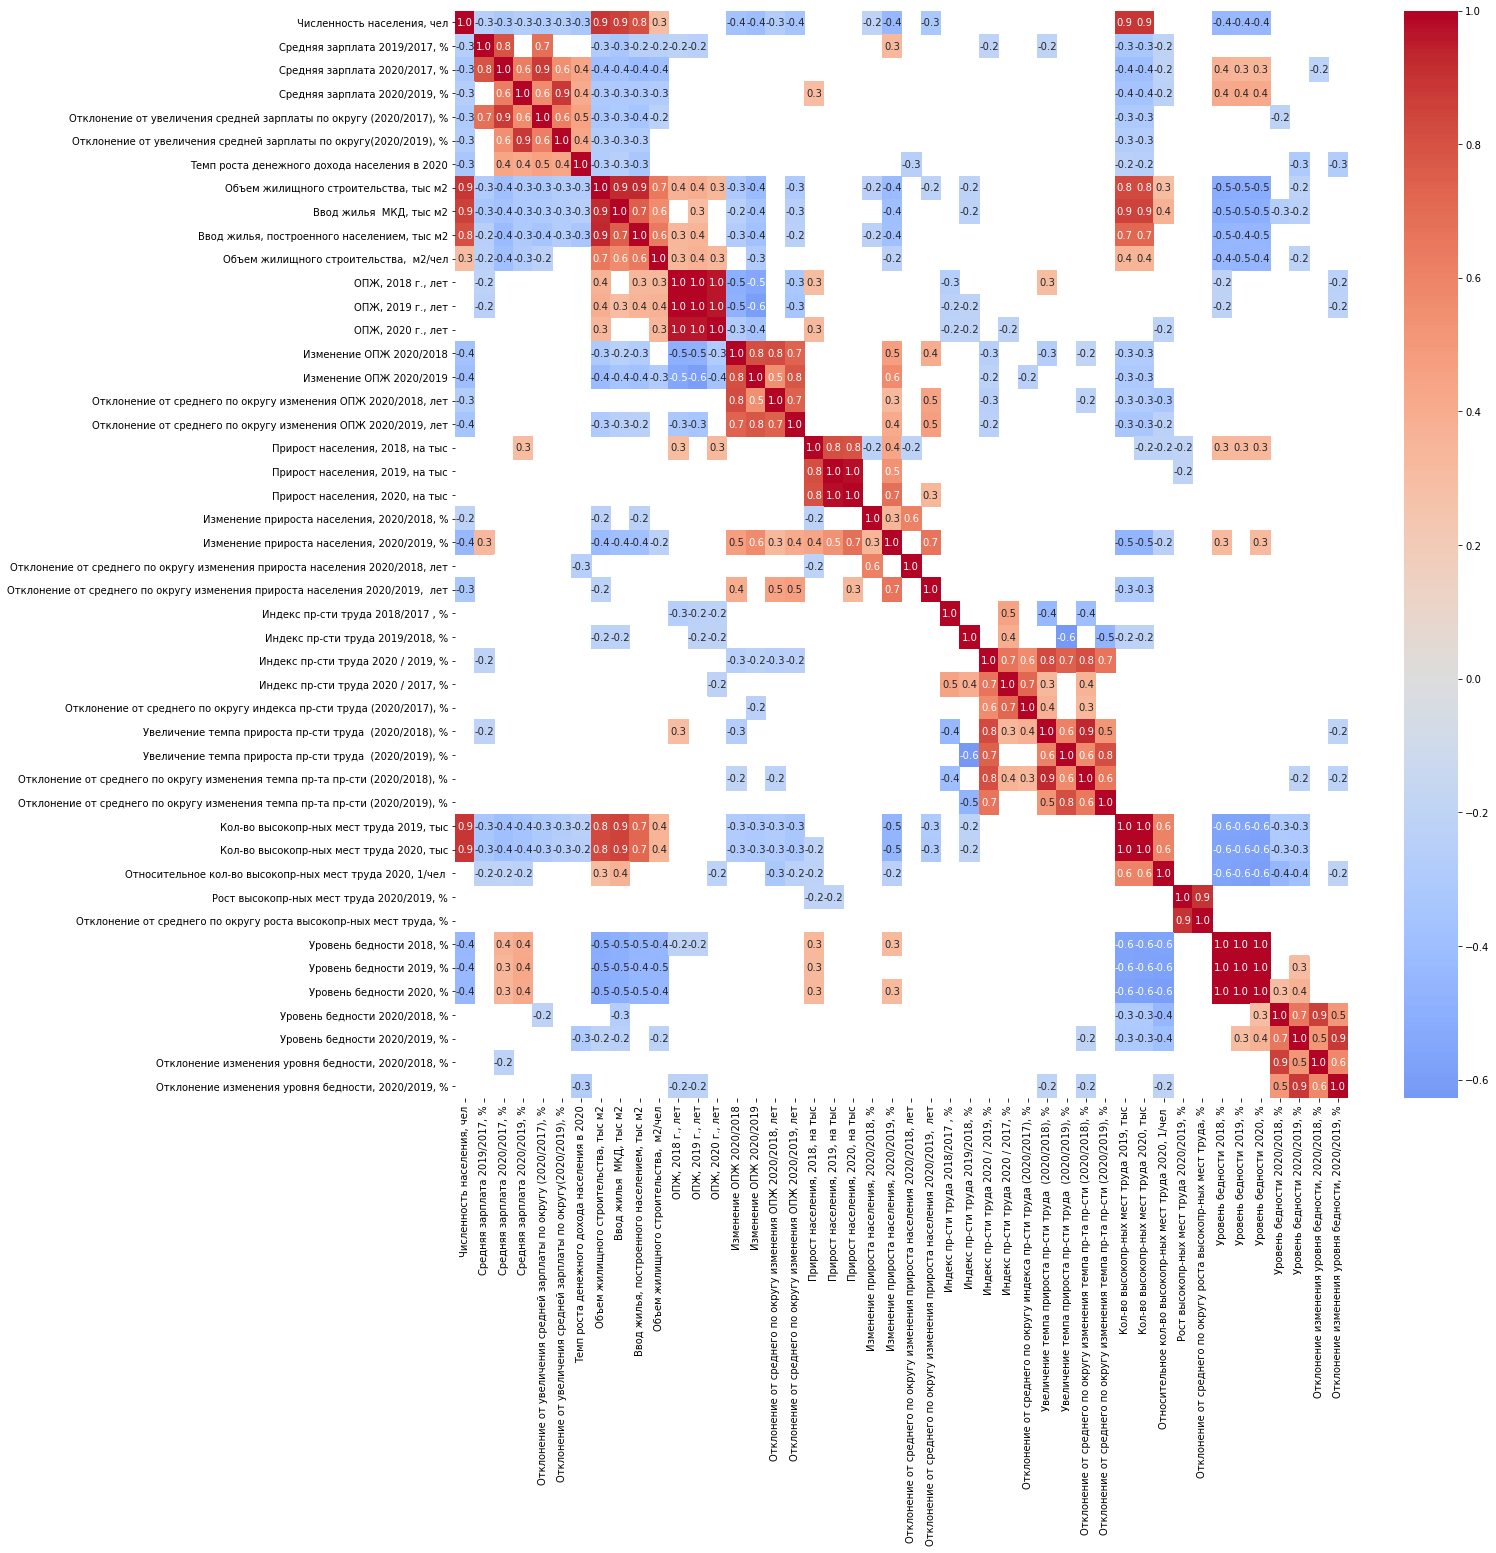

In [16]:
matrix = (df.corr(method='spearman') < 0.3) & (
    df.corr(method='spearman') > -0.2)

plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(method='spearman'), annot=True,
            fmt='.1f', center=0, cmap='coolwarm', mask=matrix)
plt.show()

Исходя из матрицы корреляции признаков видно, что положительно скоррелированы признаки, связанные с объемом строительства и количеством жителей, кол-вом жителей и относительным количеством выскопр-ных мест труда, средней зарплаты и уровнем бедности, объемом строительства и кол-вом выскопр-ных мест труда,  приростом населения и уровня бедности.

Отрицательно скоррелированы признаки, связанные с количеством жителей и уровнем бедности, кол-вом выскопр-ных мест труда и уровнем бедности

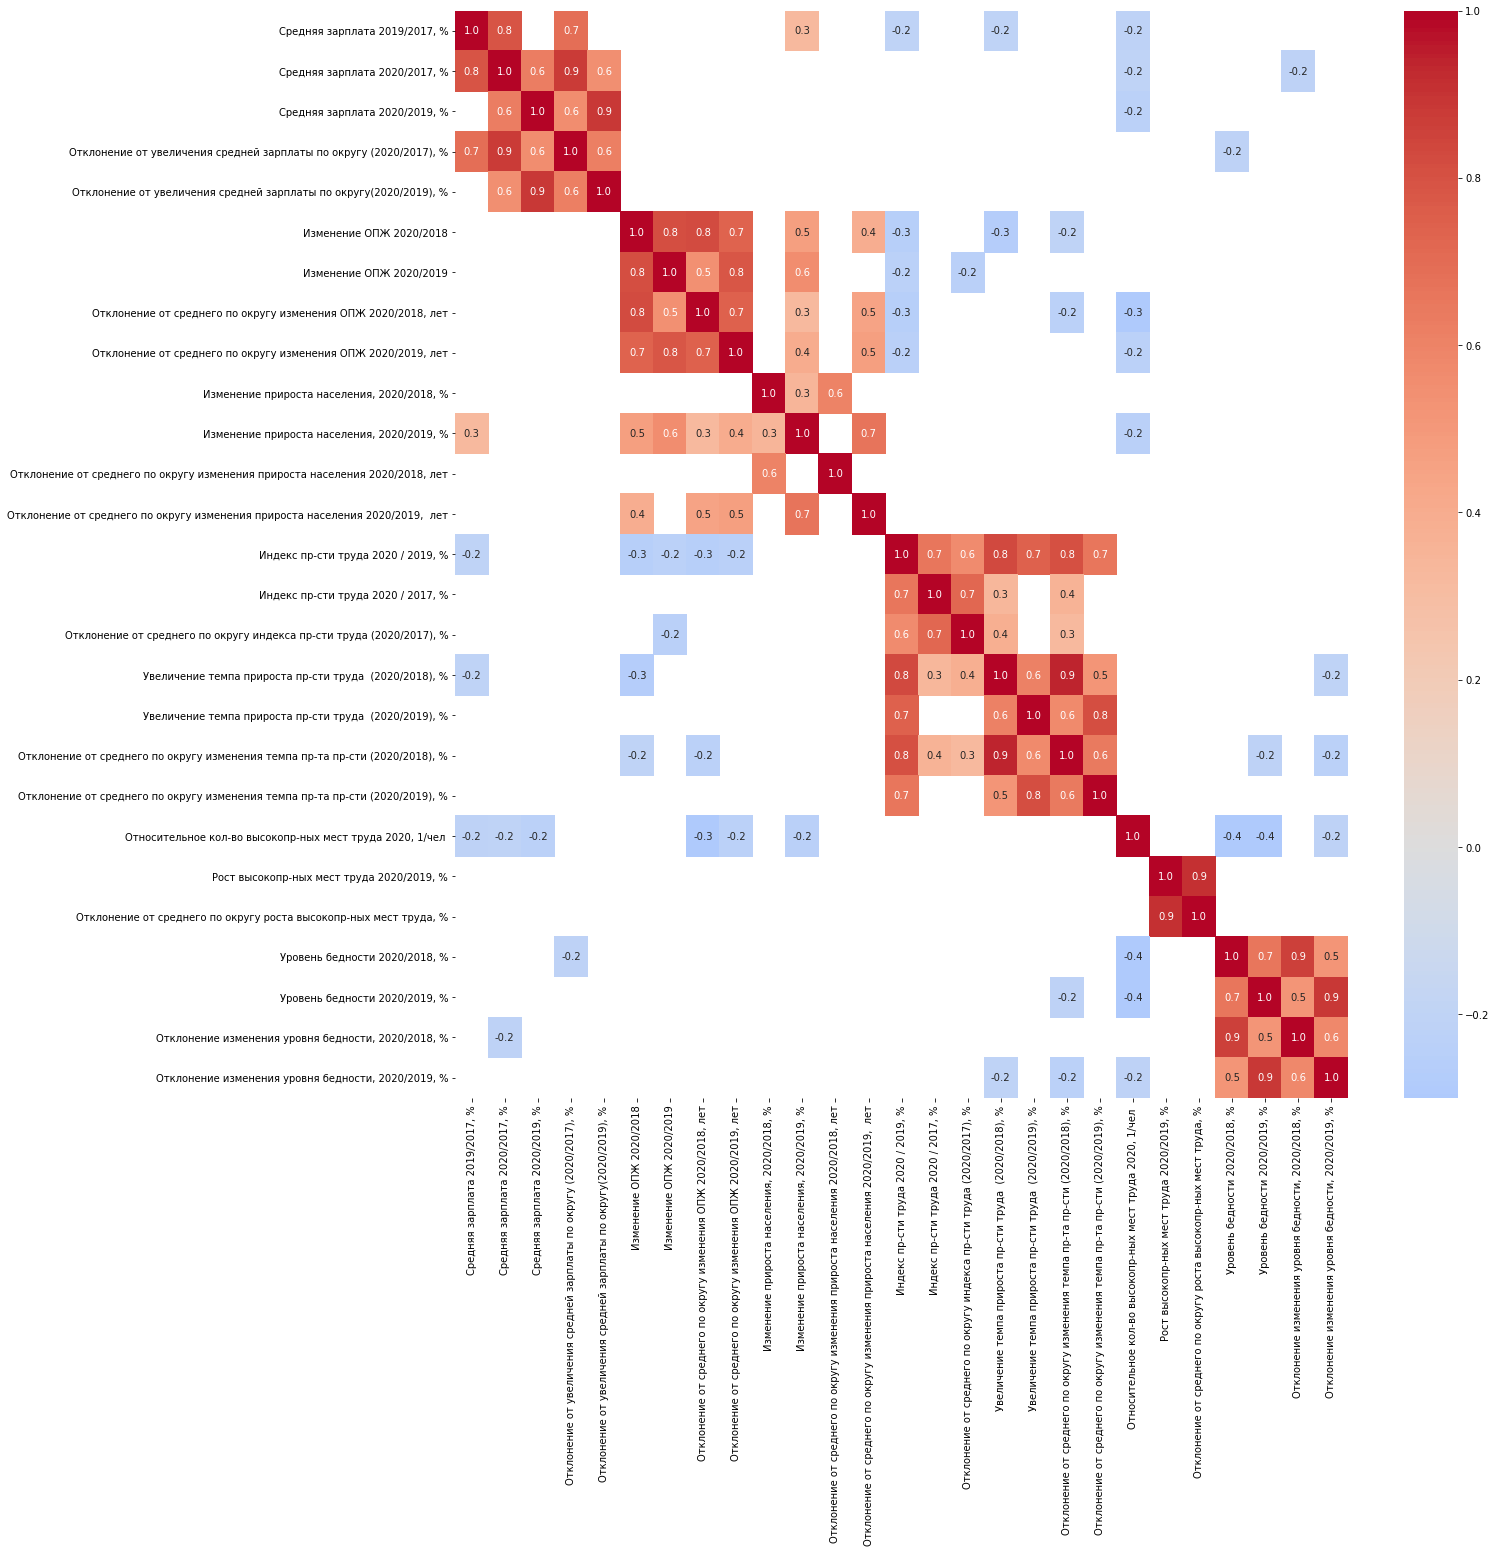

In [17]:
matrix = (df_short.corr(method='spearman') < 0.3) & (
    df_short.corr(method='spearman') > -0.2)

plt.figure(figsize=(20, 20))

sns.heatmap(df_short.corr(method='spearman'), annot=True,
            fmt='.1f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix)
plt.show()

# Модель на всех данных

In [18]:
df.drop(columns=df.columns[0], inplace=True)

In [19]:
df.dropna(inplace=True)

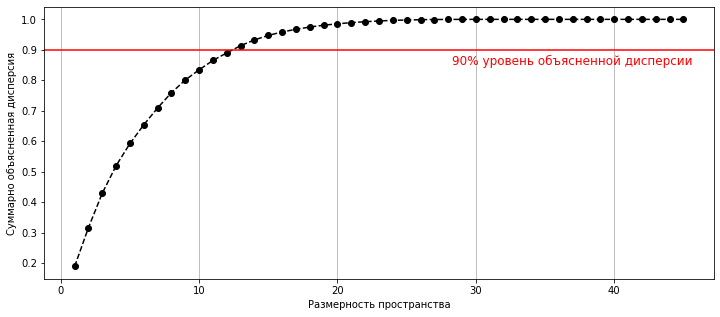

In [77]:
X_scaled = StandardScaler().fit_transform(df)

pca = PCA().fit(X_scaled)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--', color='black')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(s='90% уровень объясненной дисперсии', x=0.8 *
         len(pca.explained_variance_ratio_)+1, y=0.85, color='red', fontsize=12, ha='center')
plt.grid(axis='x')

plt.xlabel('Размерность пространства')
plt.ylabel('Суммарно объясненная дисперсия')
plt.show()

In [21]:
pca = PCA(n_components=3, random_state=352)
X_pca = pca.fit_transform(X_scaled)

fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

In [22]:
params_cluster = {
    'KMeans': {
        'random_state': 251,
    },
    'SpectralClustering': {
        'random_state': r_seed,
        'affinity': 'nearest_neighbors',
        'n_neighbors': 20,
        'n_jobs': -1
    },
    'AgglomerativeClustering': {
    }
}

  0%|          | 0/10 [00:00<?, ?it/s]

2 clusters
----------------------------------------------------------------------------------------------------


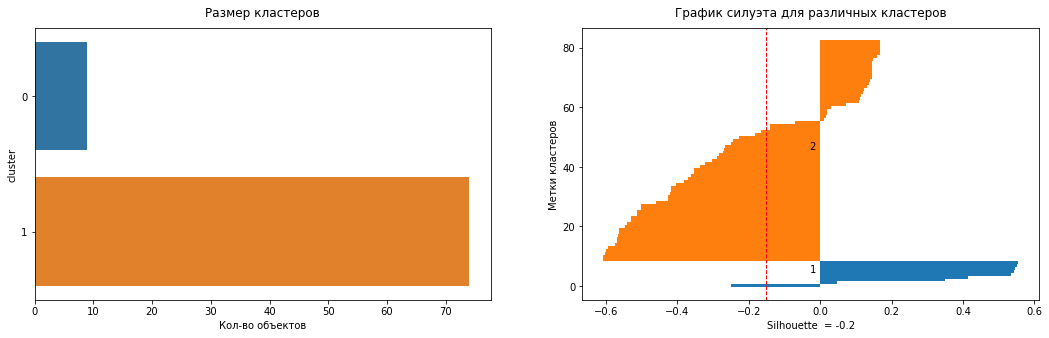

3 clusters
----------------------------------------------------------------------------------------------------


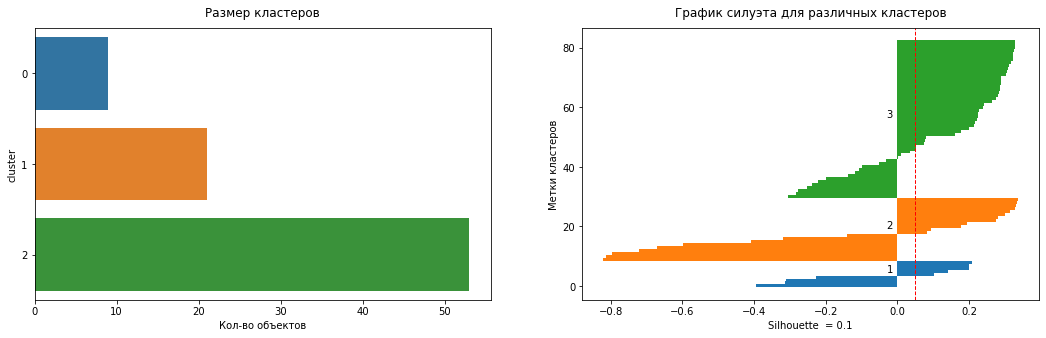

4 clusters
----------------------------------------------------------------------------------------------------


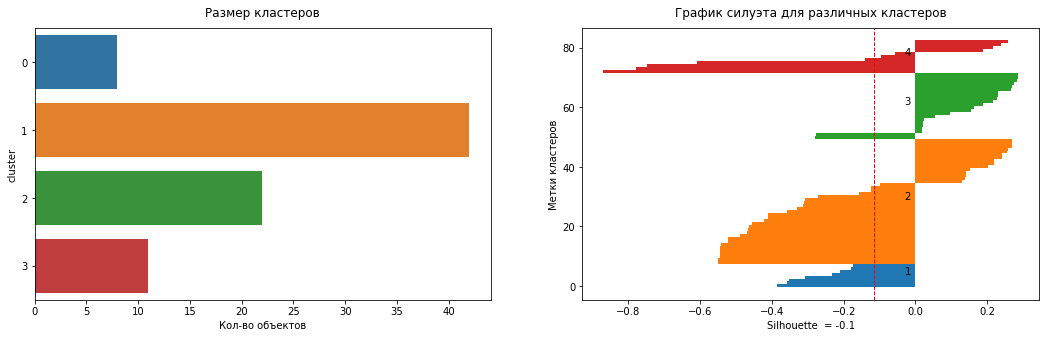

5 clusters
----------------------------------------------------------------------------------------------------


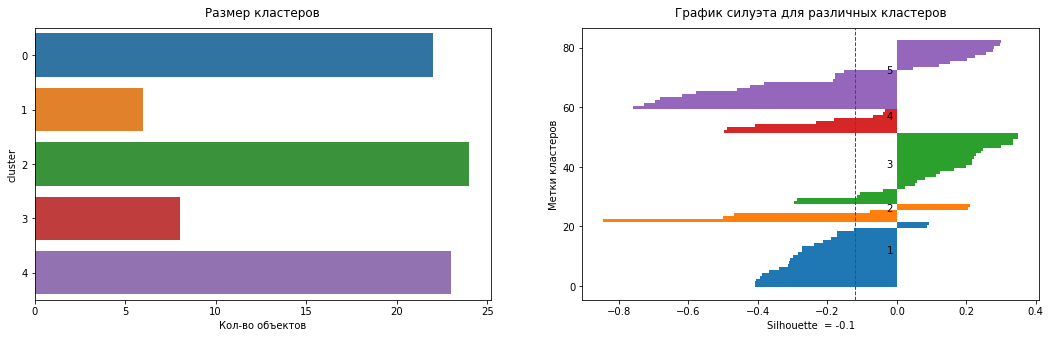

6 clusters
----------------------------------------------------------------------------------------------------


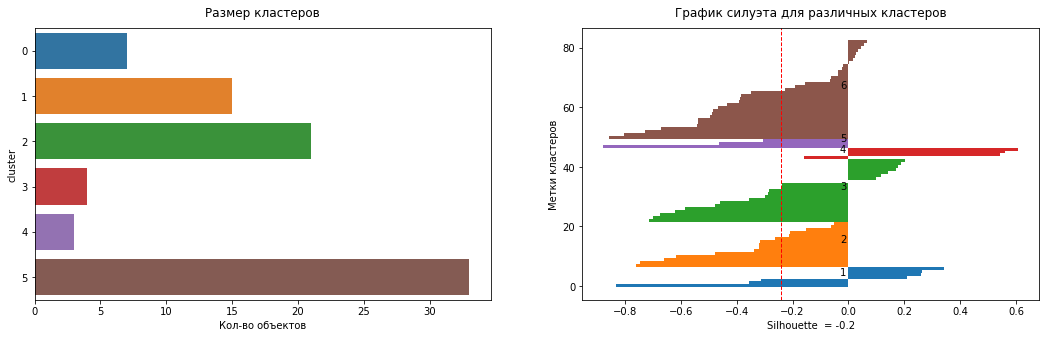

7 clusters
----------------------------------------------------------------------------------------------------


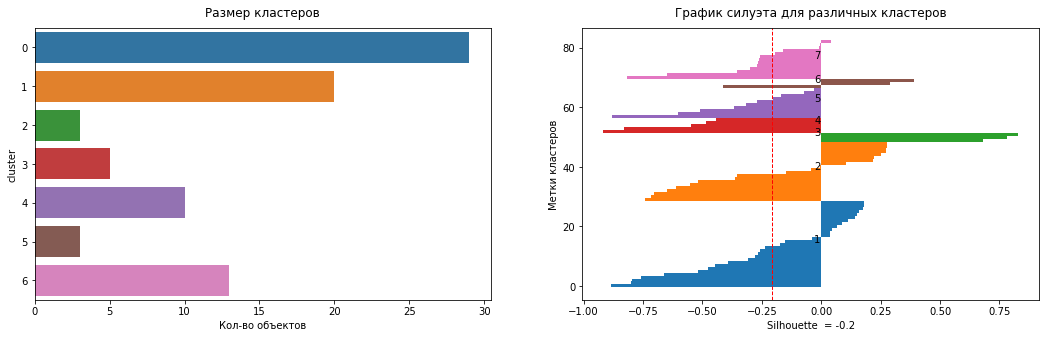

8 clusters
----------------------------------------------------------------------------------------------------


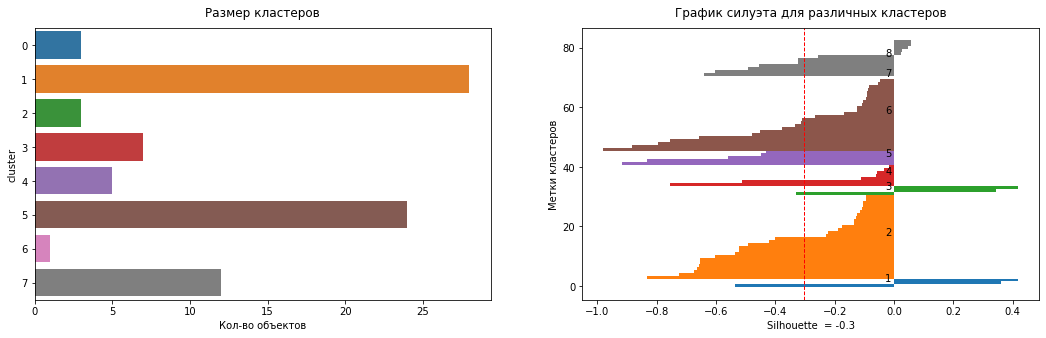

9 clusters
----------------------------------------------------------------------------------------------------


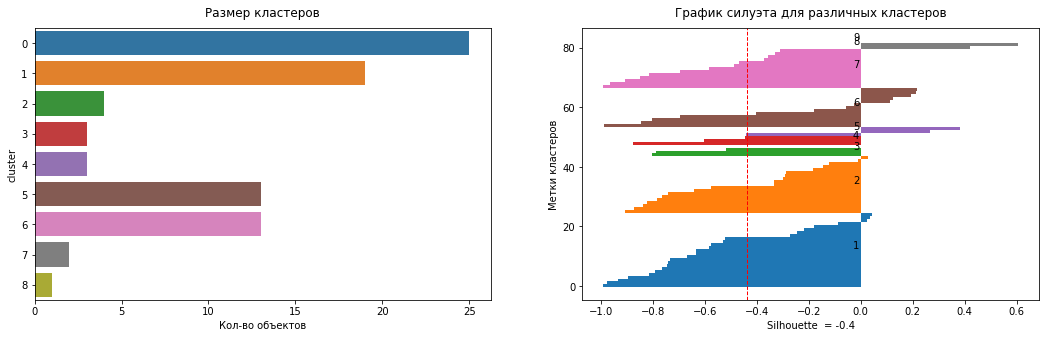

10 clusters
----------------------------------------------------------------------------------------------------


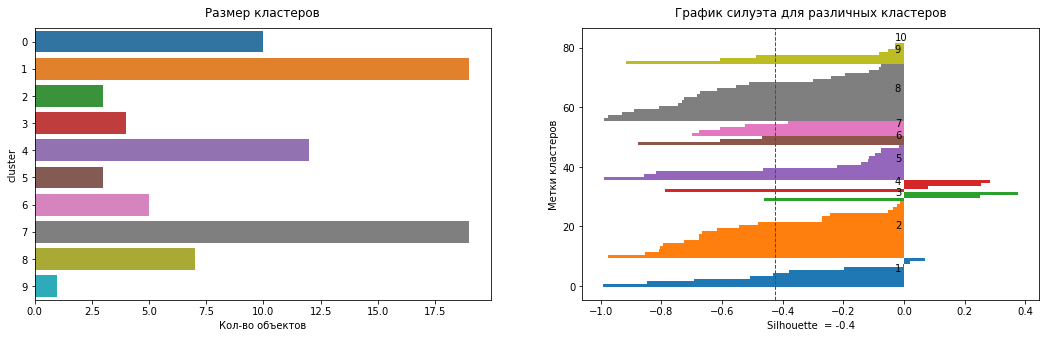

11 clusters
----------------------------------------------------------------------------------------------------


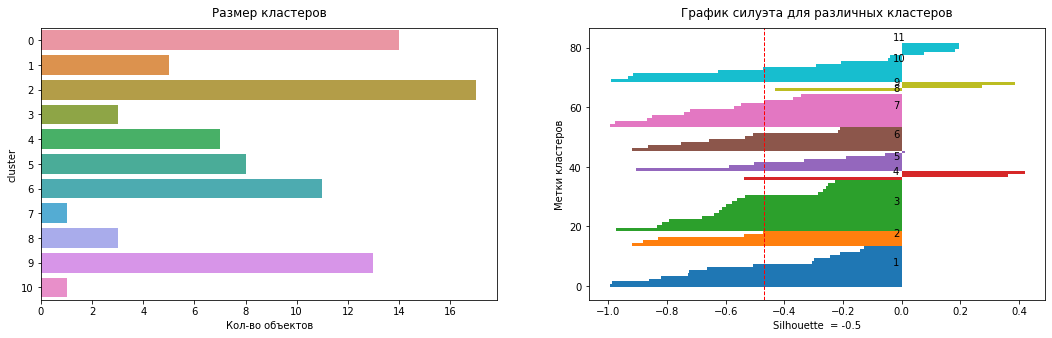

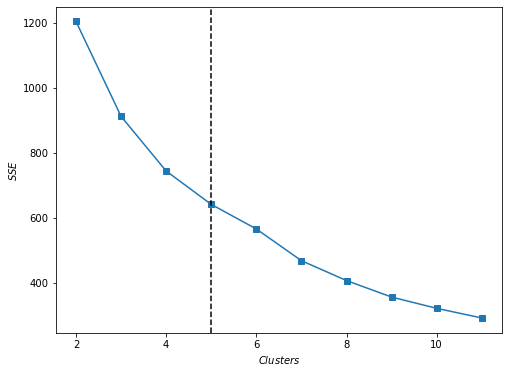

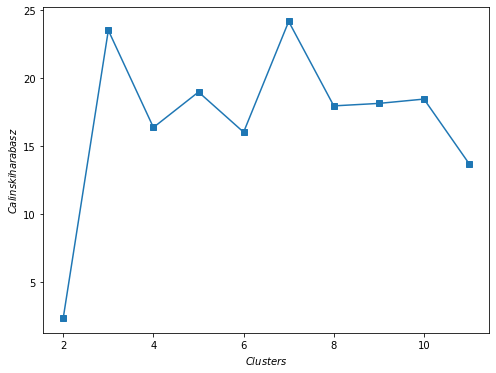

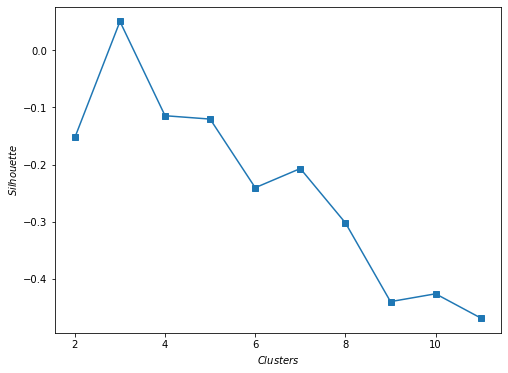

In [166]:
dict_clusters_km = plot_clustering(data=df,
                                   data_scale=X_scaled,
                                   embedding=X_pca,
                                   kwargs=params_cluster['KMeans'],
                                   model=KMeans,
                                   type_train='embedding')

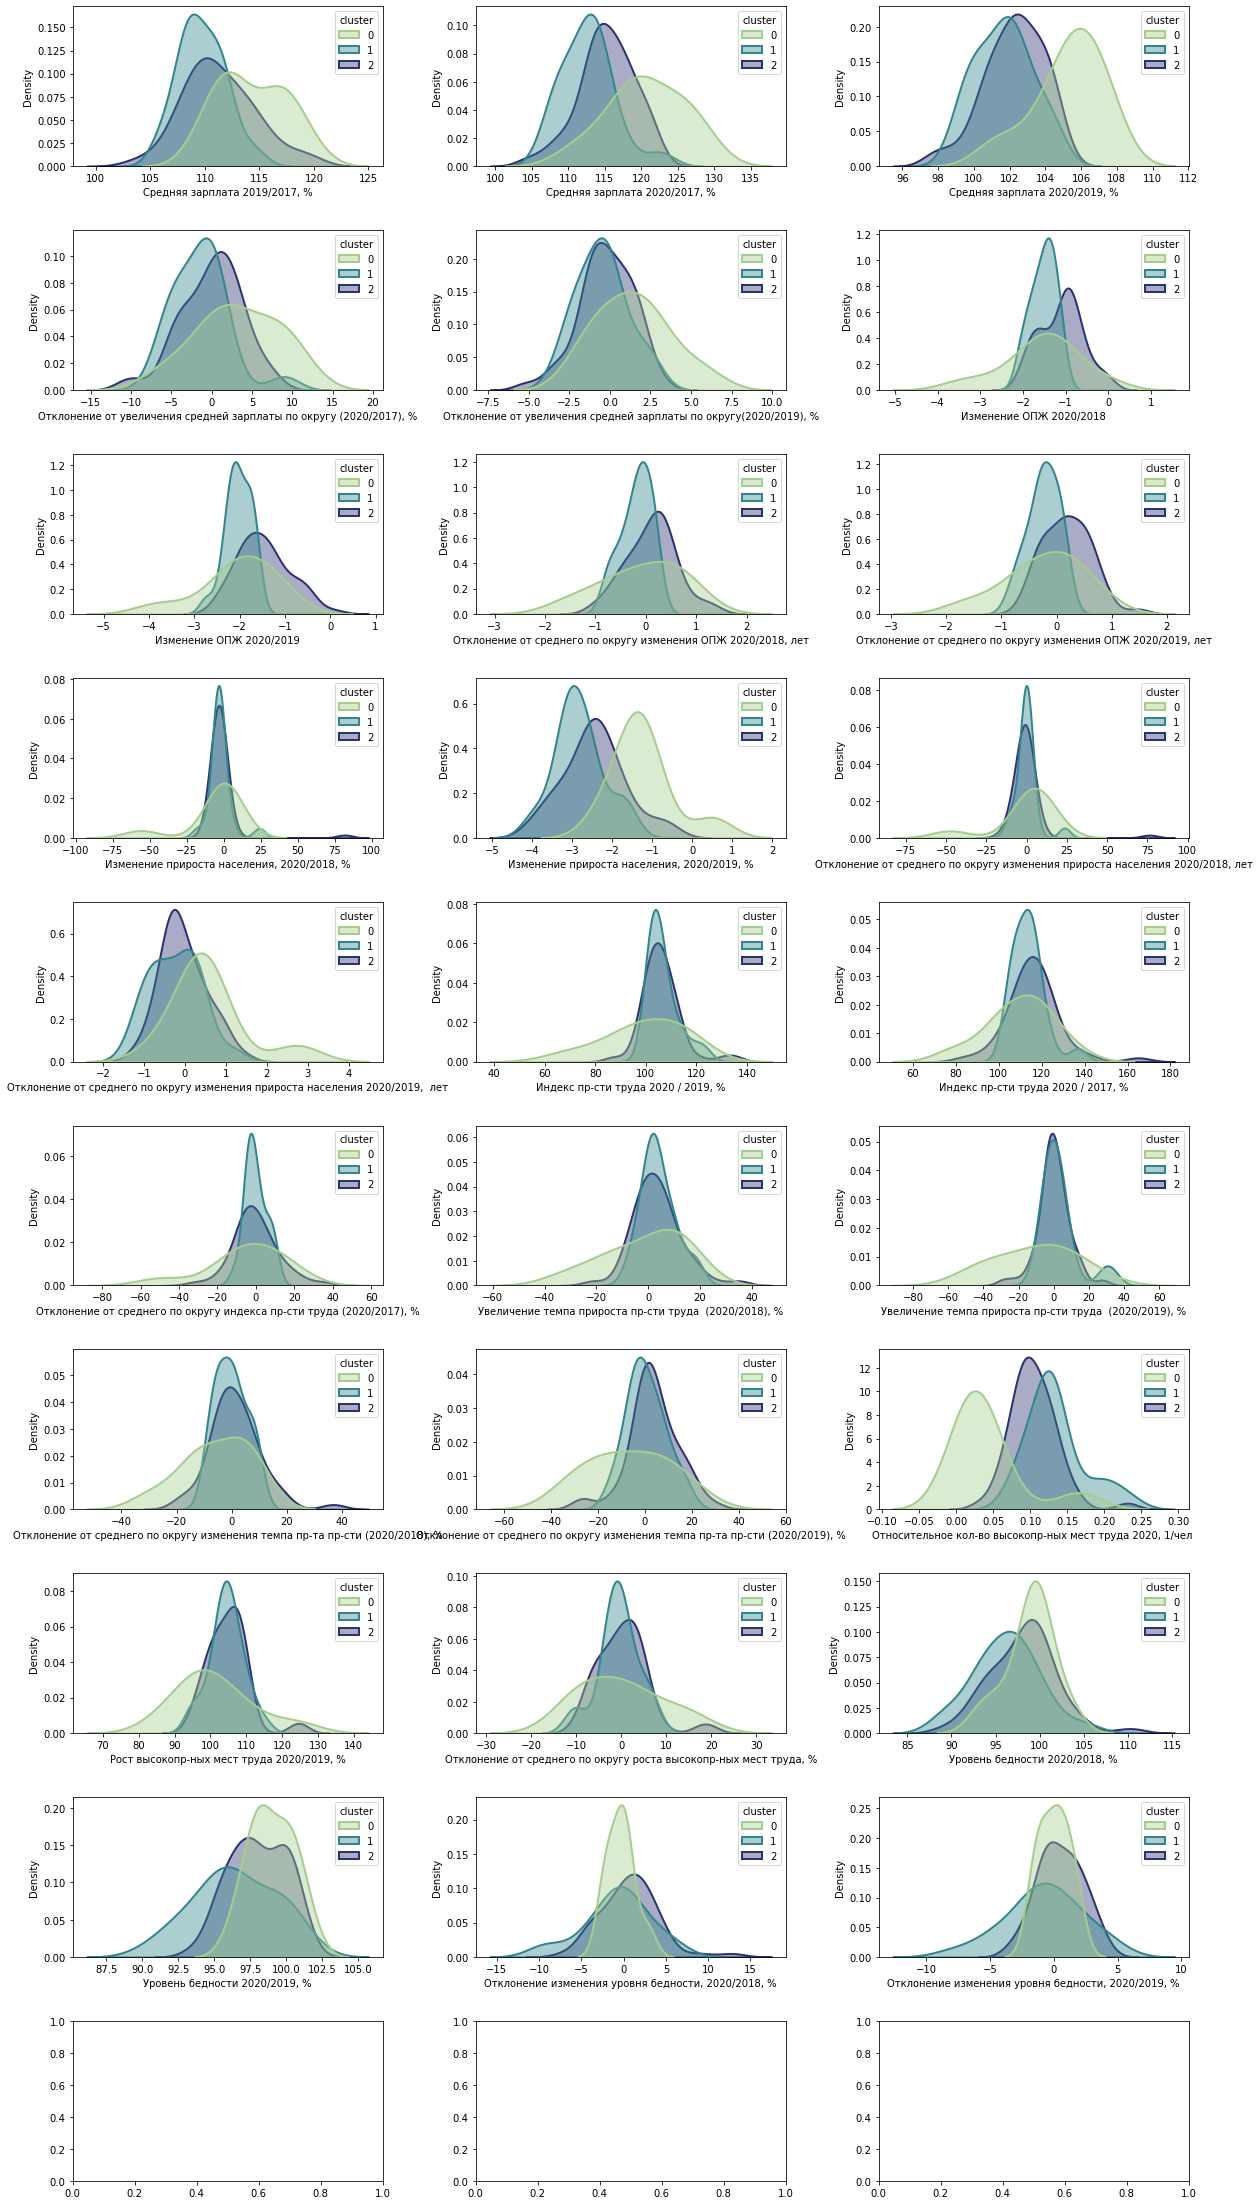

In [78]:
plotting_kde_num(df, dict_clusters_km[3], df_short.columns)

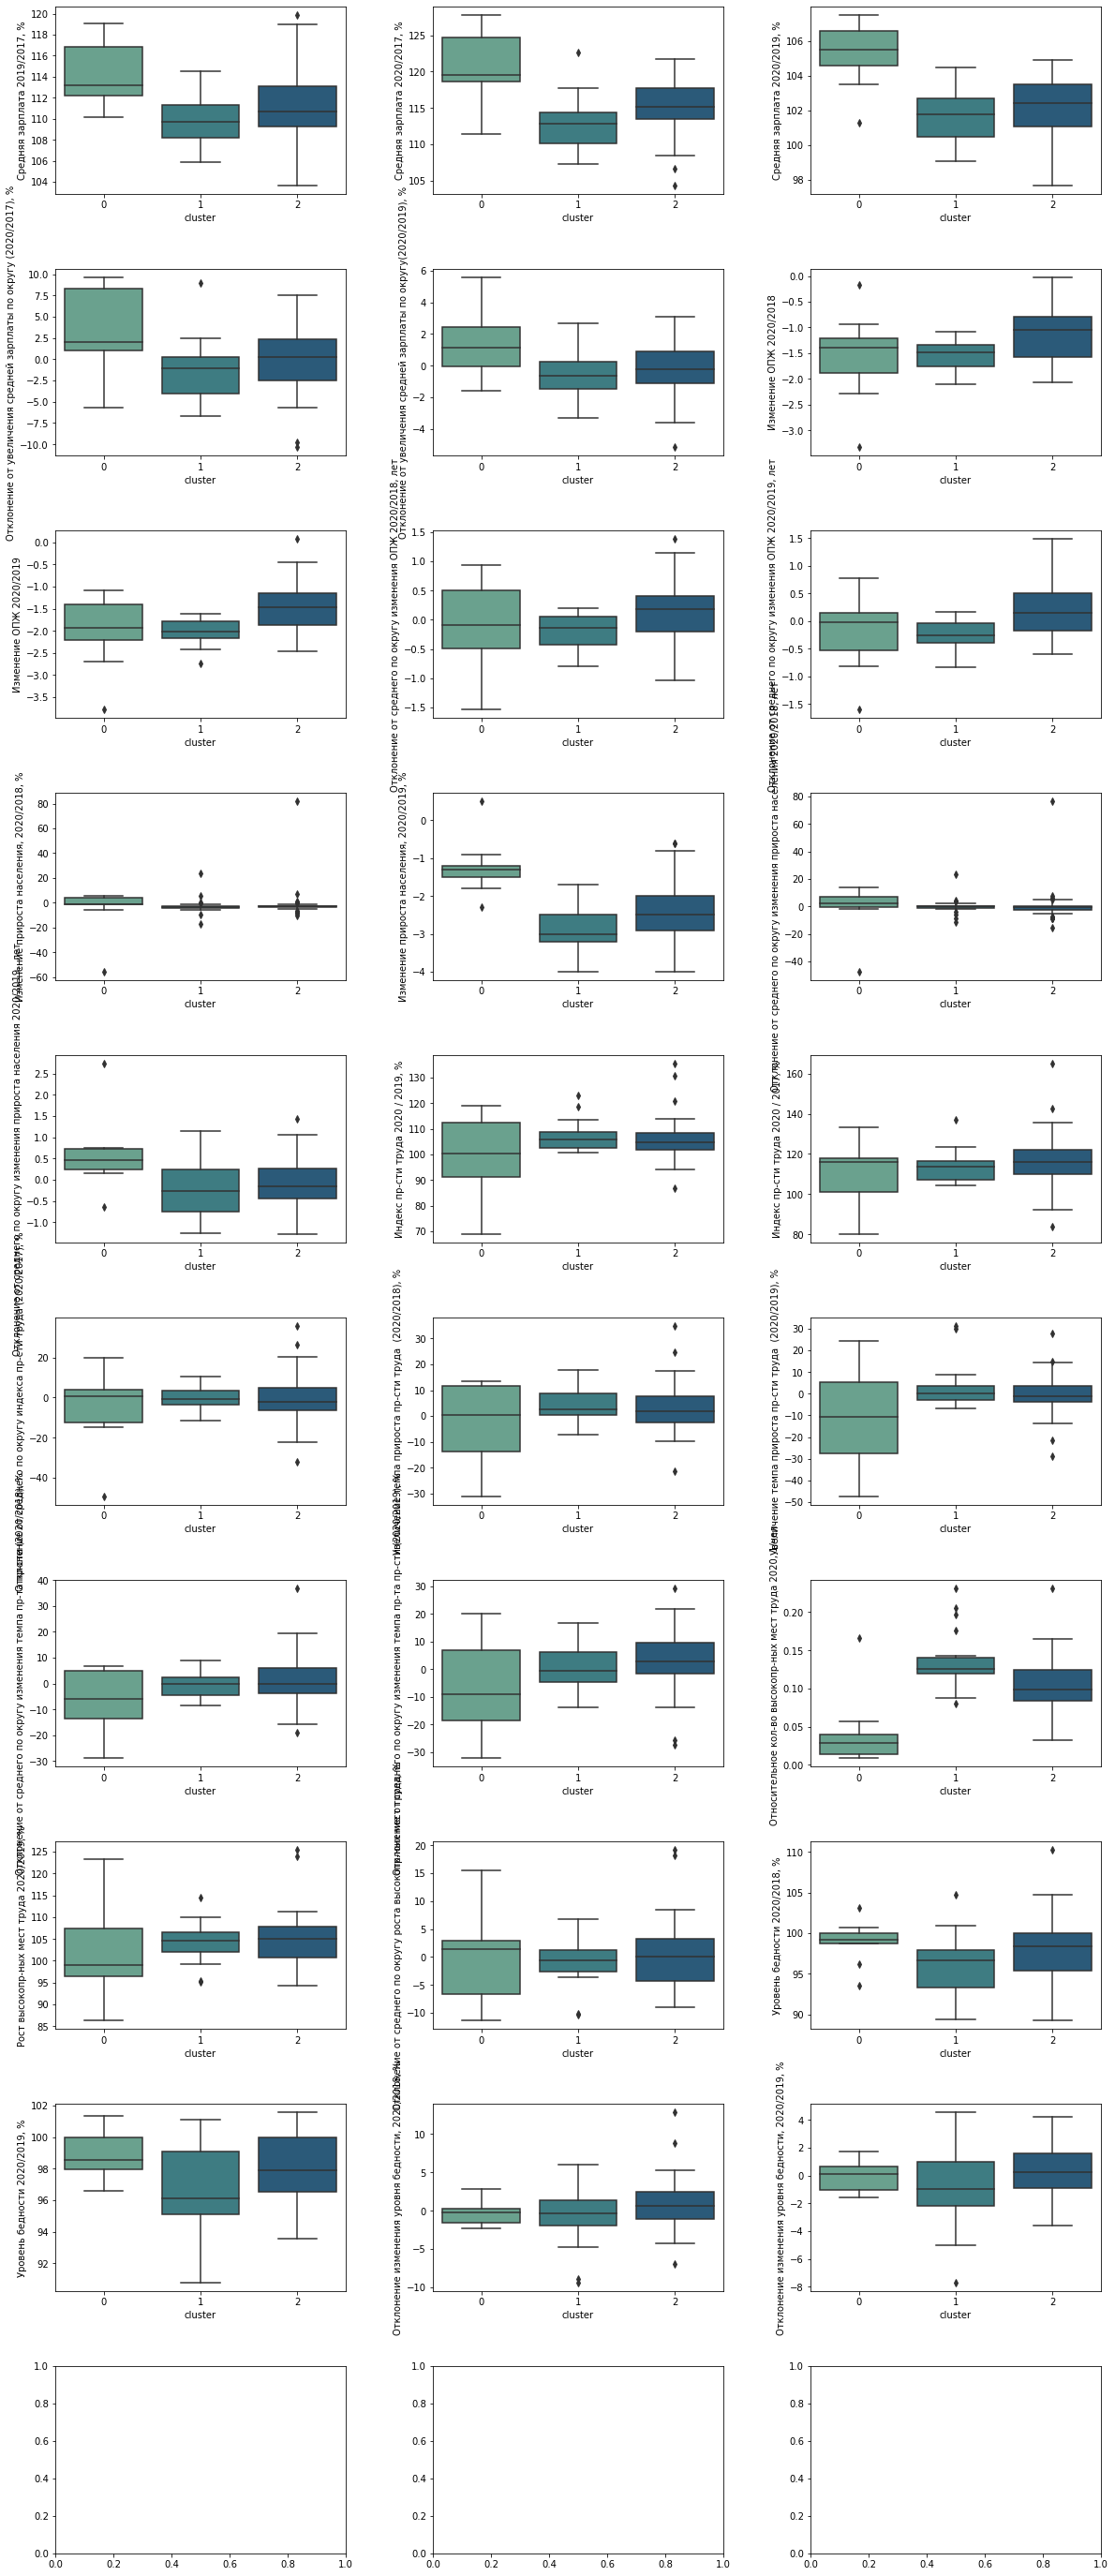

In [113]:
plotting_num(df, dict_clusters_km[3], df_short.columns)

In [112]:
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2,
    labels={'color': 'labels'},
    color=dict_clusters_km[3],
    color_continuous_scale=["red", "blue", "green"])

fig.update_traces(marker_size=3)
fig.show()

## Результаты

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



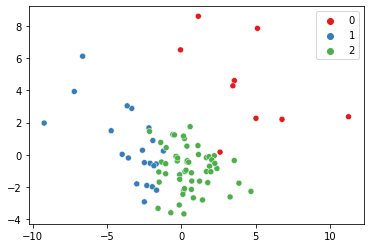

In [26]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1],
                hue=dict_clusters_km[3], palette='Set1')
plt.show()

In [27]:
dict_clusters_km[3]

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
df_labels = df.copy()
df_labels['labels'] = dict_clusters_km[3]

In [29]:
df_1 = df_labels.loc[df_labels['labels'] == 1]
df_labels.loc[df_labels['labels'] == 1].index

Index(['Белгородская область', 'Воронежская область', 'Калужская область',
       'Липецкая область', 'Московская область', 'Ярославская область',
       'г. Москва', 'Ленинградская область', 'г.Санкт-Петербург ',
       'Краснодарский край', 'Волгоградская область', 'Ростовская область',
       'Республика Башкортостан', 'Республика Татарстан',
       'Нижегородская область', 'Самарская область', 'Свердловская область',
       'Тюменская область ', 'Ханты-Мансийский автономный округ-Югра',
       'Челябинская область', 'Новосибирская область'],
      dtype='object')

In [30]:
df_2 = df_labels.loc[df_labels['labels'] == 2]
df_labels.loc[df_labels['labels'] == 2].index

Index(['Брянская область', 'Владимирская область', 'Ивановская область',
       'Костромская область', 'Курская область', 'Орловская область',
       'Рязанская область', 'Смоленская область', 'Тамбовская область',
       'Тверская область', 'Тульская область', 'Республика Карелия',
       'Республика Коми',
       'Архангельская область без Ненецкого автономного округа',
       'Вологодская область', 'Калининградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'Республика Адыгея',
       'Республика Крым', 'Астраханская область', 'г. Севастополь',
       'Республика Северная Осетия-Алания', 'Ставропольский край',
       'Республика Марий Эл ', 'Республика Мордовия', 'Удмуртская Республика',
       'Чувашская Республика', 'Пермский край', 'Кировская область',
       'Оренбургская область', 'Пензенская область', 'Саратовская область',
       'Ульяновская область', 'Курганская область',
       'Тюменская область без автономных округов', 'Республика

In [31]:
df_0 = df_labels.loc[df_labels['labels'] == 0]
df_labels.loc[df_labels['labels'] == 0].index

Index(['Республика Калмыкия', 'Республика Дагестан', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика',
       'Чеченская Республика', 'Республика Алтай', 'Республика Тыва',
       'Республика Саха (Якутия)'],
      dtype='object')

In [83]:
pd.set_option('display.max_columns', None)

In [84]:
df_1.describe()

Средняя зарплата 2019/2017, %  Средняя зарплата 2020/2017, %  \
count                      21.000000                      21.000000   
mean                      109.683948                     112.661905   
std                         2.117428                       3.601177   
min                       105.894000                     107.300000   
25%                       108.204000                     110.100000   
50%                       109.734300                     112.900000   
75%                       111.302400                     114.400000   
max                       114.532000                     122.600000   

       Средняя зарплата 2020/2019, %  \
count                      21.000000   
mean                      101.652381   
std                         1.564806   
min                        99.100000   
25%                       100.500000   
50%                       101.800000   
75%                       102.700000   
max                       104.500000   

       Отклонение от увеличения средней зарплаты по округу (2020/2017), %  \
count                                          21.000000                    
mean                                           -1.401966                    
std                                             3.463242                    
min                                            -6.685714                    
25%                                            -4.063636                    
50%                                            -1.085714                    
75%                                             0.214286                    
max                                             8.961111                    

       Отклонение от увеличения средней зарплаты по округу(2020/2019), %  \
count                                          21.000000                   
mean                                           -0.507691                   
std                                             1.566390                   
min                                            -3.328571                   
25%                                            -1.490909                   
50%                                            -0.628571                   
75%                                             0.271429                   
max                                             2.705556                   

       Темп роста денежного дохода населения в 2020  \
count                                     21.000000   
mean                                      97.238095   
std                                        2.283523   
min                                       91.900000   
25%                                       95.200000   
50%                                       97.900000   
75%                                       98.900000   
max                                      100.300000   

       Объем жилищного строительства, тыс м2  Ввод жилья  МКД, тыс м2  \
count                              21.000000                21.000000   
mean                                2.471590                 1.379019   
std                                 1.940687                 1.309277   
min                                 0.746300                 0.179000   
25%                                 1.231800                 0.482900   
50%                                 1.944400                 0.956300   
75%                                 2.680100                 1.446600   
max                                 9.040300                 4.554400   

       Ввод жилья, построенного населением, тыс м2  \
count                                    21.000000   
mean                                      1.092581   
std                                       0.923190   
min                                       0.206600   
25%                                       0.504000   
50%                                       0.918000   
75%                                       1.321600   
max                                      

In [ ]:
df_2.describe()

In [101]:
df_descr0 = df_0.describe(include='all')
df_descr1 = df_1.describe(include='all')
df_descr2 = df_2.describe(include='all')

In [102]:
from os import path
if not path.exists('Clusters'):
    os.mkdir('Clusters')

In [103]:
df_descr0.to_excel('clusters/Full_data_cluster0.xlsx')
df_descr1.to_excel('clusters/Full_data_cluster1.xlsx')
df_descr2.to_excel('clusters/Full_data_cluster2.xlsx')

# Модель на сокращенном наборе признаков

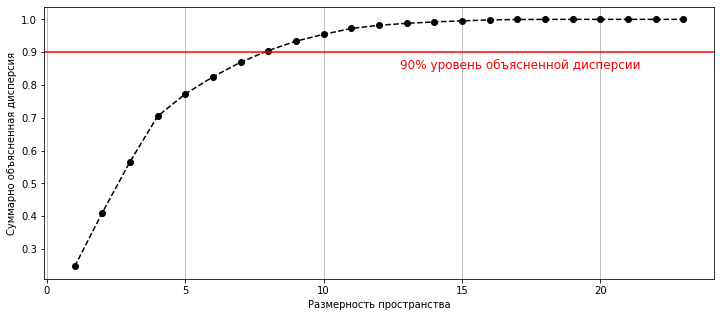

In [167]:
X_short = StandardScaler().fit_transform(df_short)

pca = PCA().fit(X_short)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--', color='black')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(s='90% уровень объясненной дисперсии', x=0.7 *
         len(pca.explained_variance_ratio_)+1, y=0.85, color='red', fontsize=12, ha='center')
plt.grid(axis='x')

plt.xlabel('Размерность пространства')
plt.ylabel('Суммарно объясненная дисперсия')
plt.show()

In [168]:
pca_short = PCA(n_components=0.9, random_state=r_seed)
X_pca_short = pca.fit_transform(X_short)

fig = px.scatter_3d(
    X_pca_short, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

  0%|          | 0/10 [00:00<?, ?it/s]

2 clusters
----------------------------------------------------------------------------------------------------


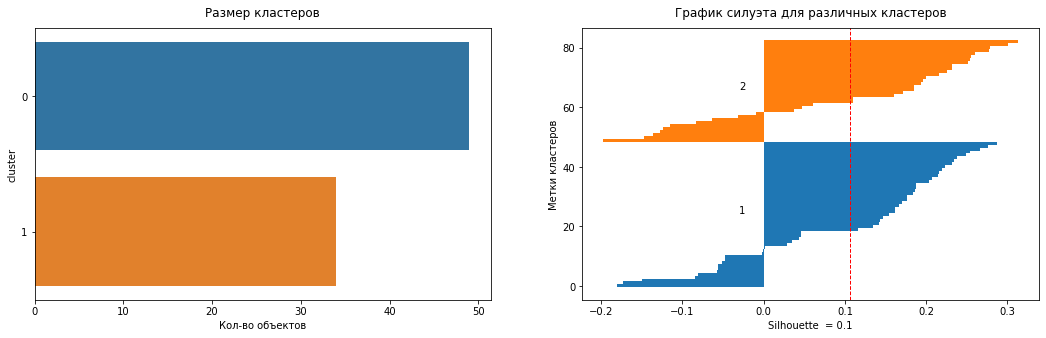

3 clusters
----------------------------------------------------------------------------------------------------


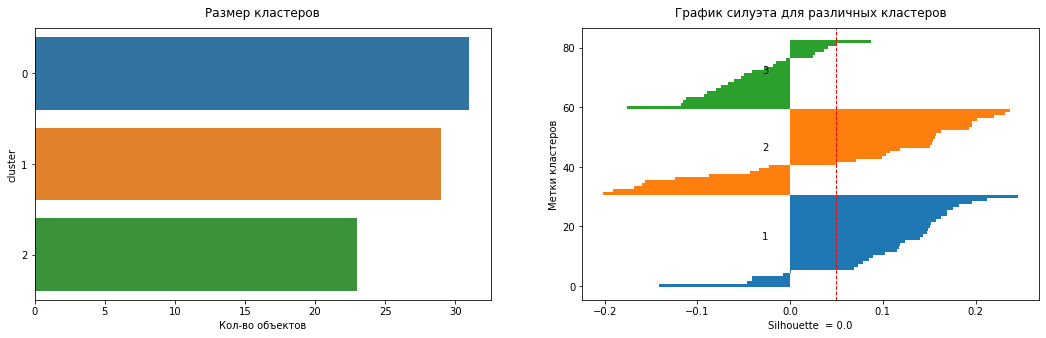

4 clusters
----------------------------------------------------------------------------------------------------


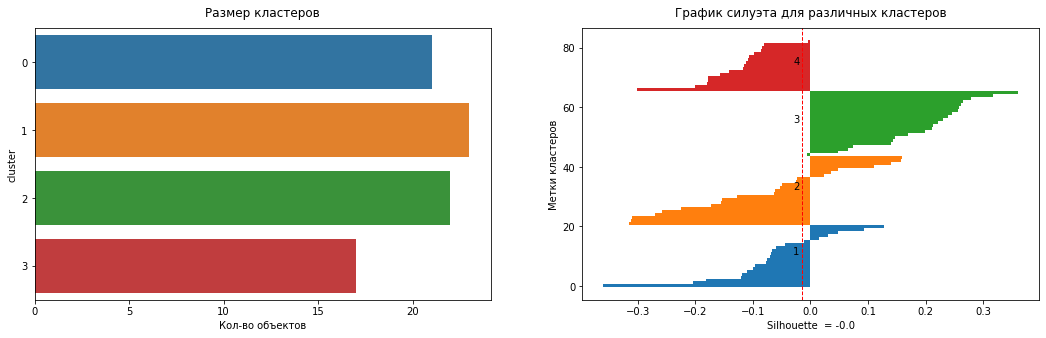

5 clusters
----------------------------------------------------------------------------------------------------


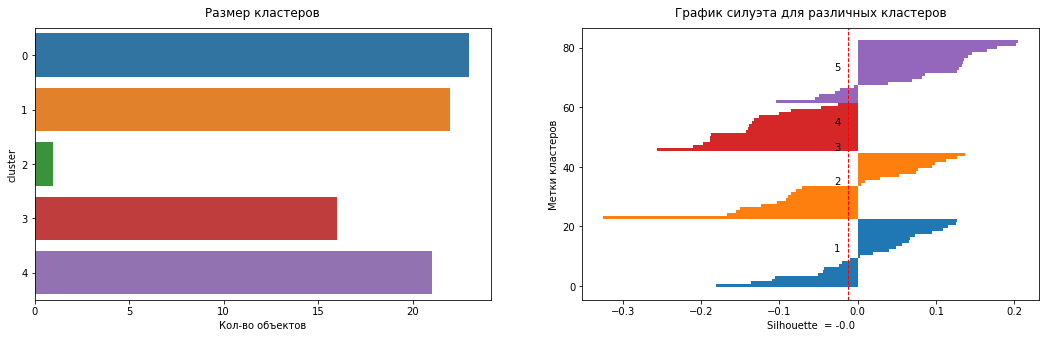

6 clusters
----------------------------------------------------------------------------------------------------


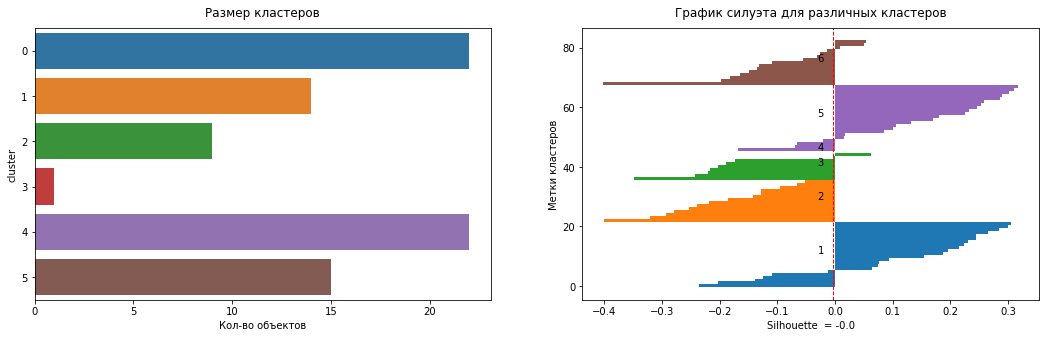

7 clusters
----------------------------------------------------------------------------------------------------


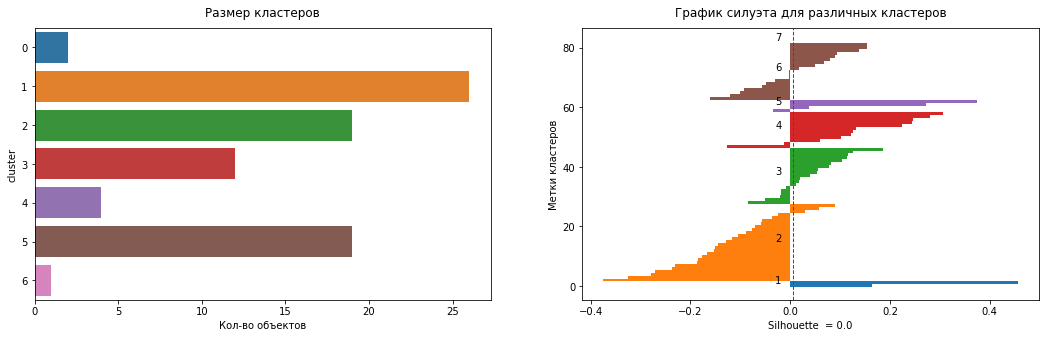

8 clusters
----------------------------------------------------------------------------------------------------


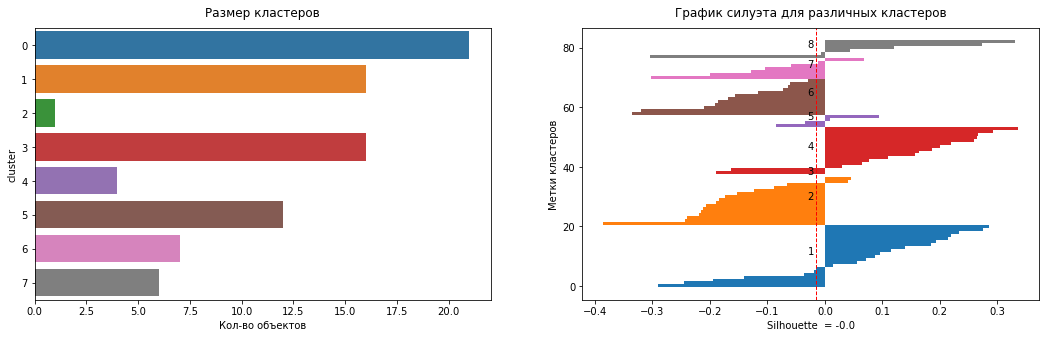

9 clusters
----------------------------------------------------------------------------------------------------


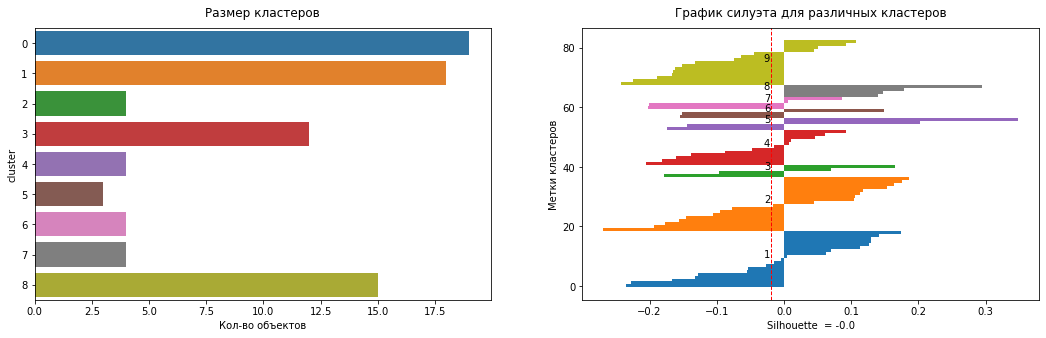

10 clusters
----------------------------------------------------------------------------------------------------


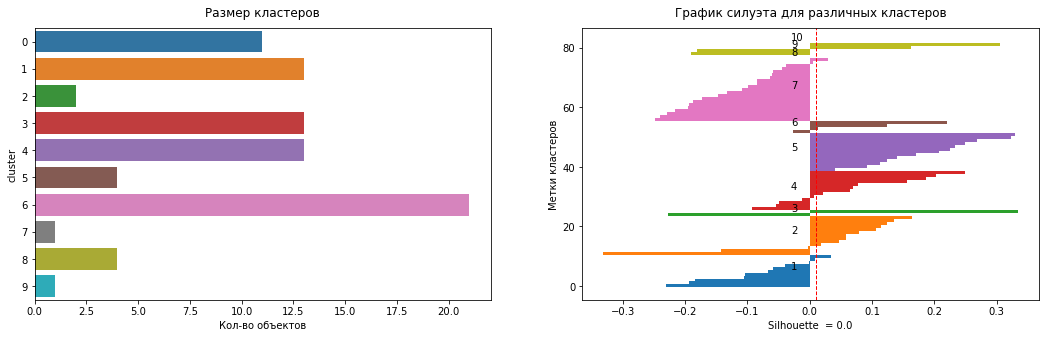

11 clusters
----------------------------------------------------------------------------------------------------


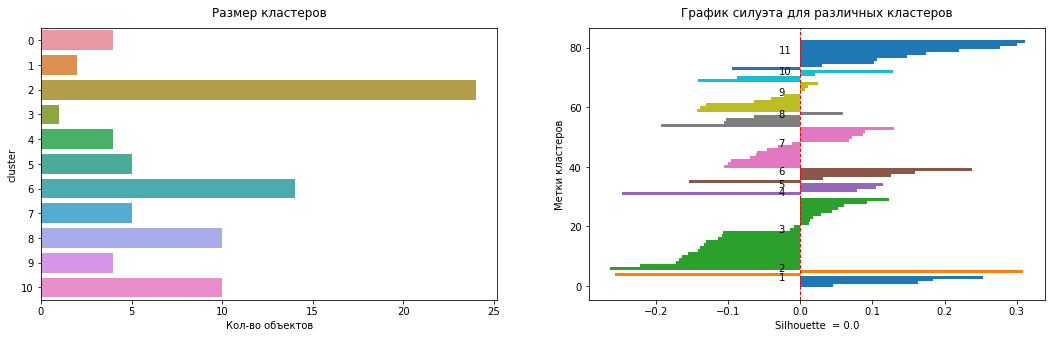

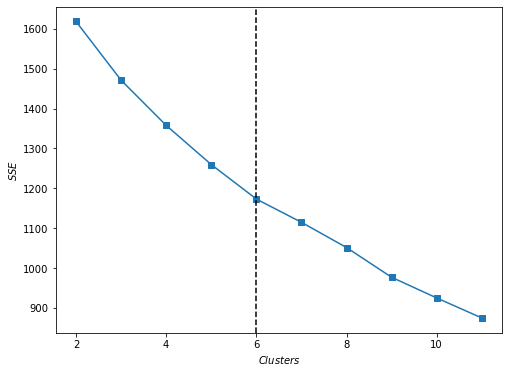

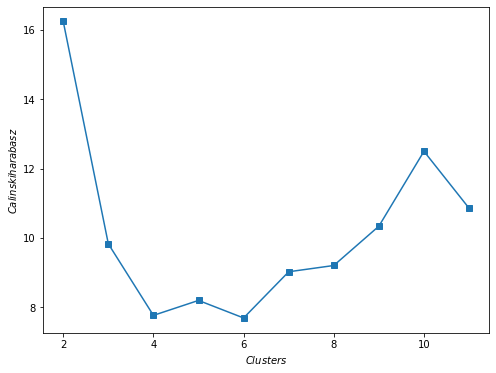

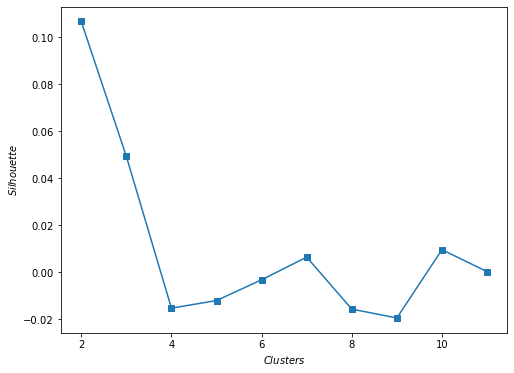

In [169]:
dict_short_km = plot_clustering(data=df_short,
                                data_scale=X_short,
                                embedding=X_pca_short,
                                kwargs=params_cluster['KMeans'],
                                model=KMeans,
                                type_train='embedding')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density est

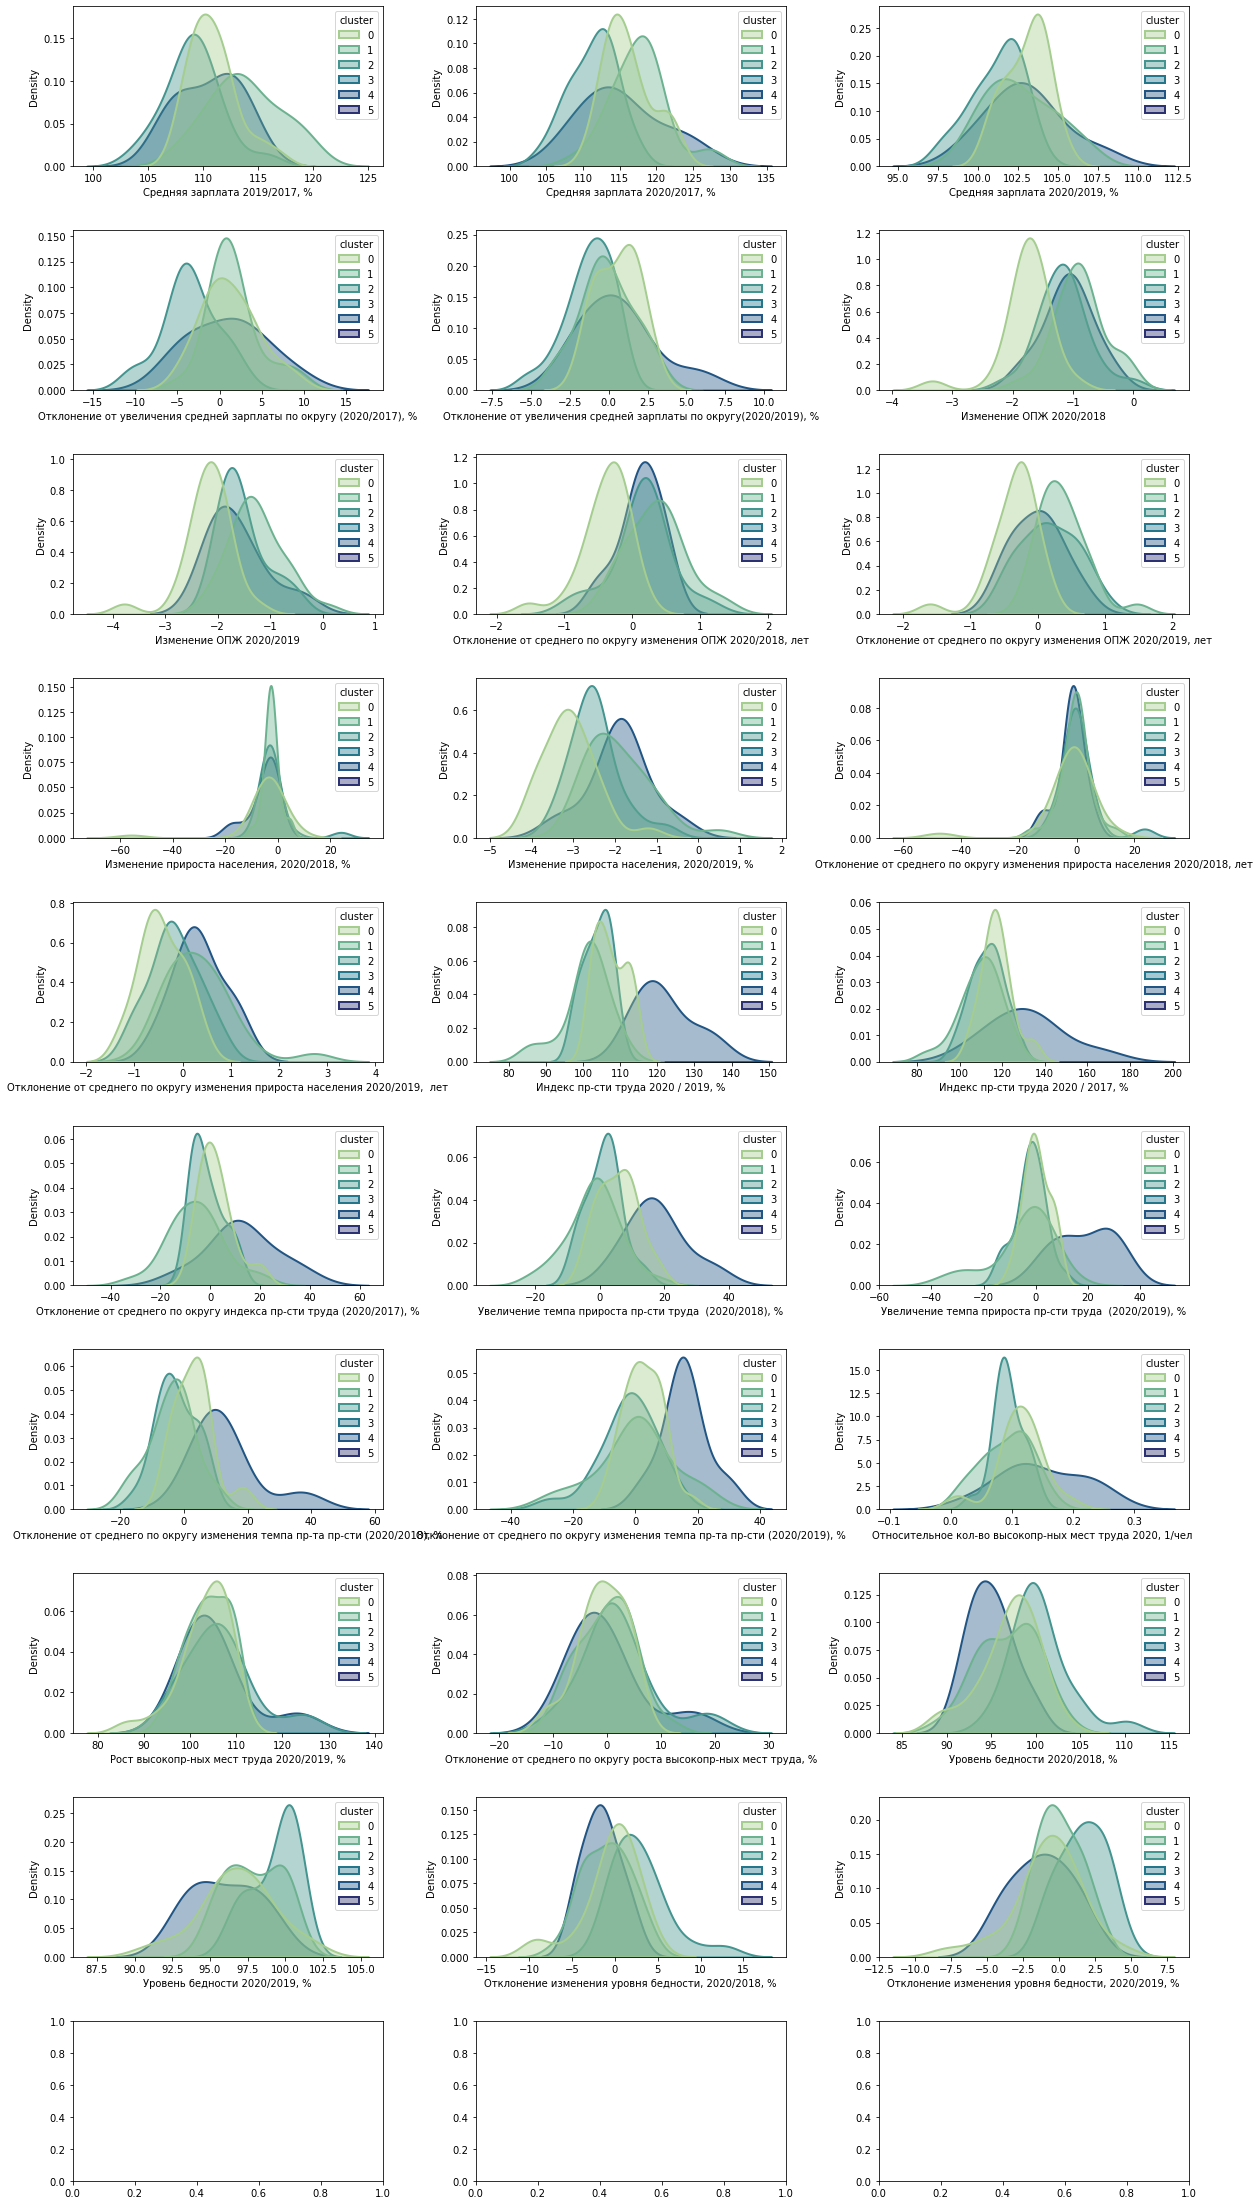

In [35]:
plotting_kde_num(df_short, dict_short_km[6], df_short.columns)

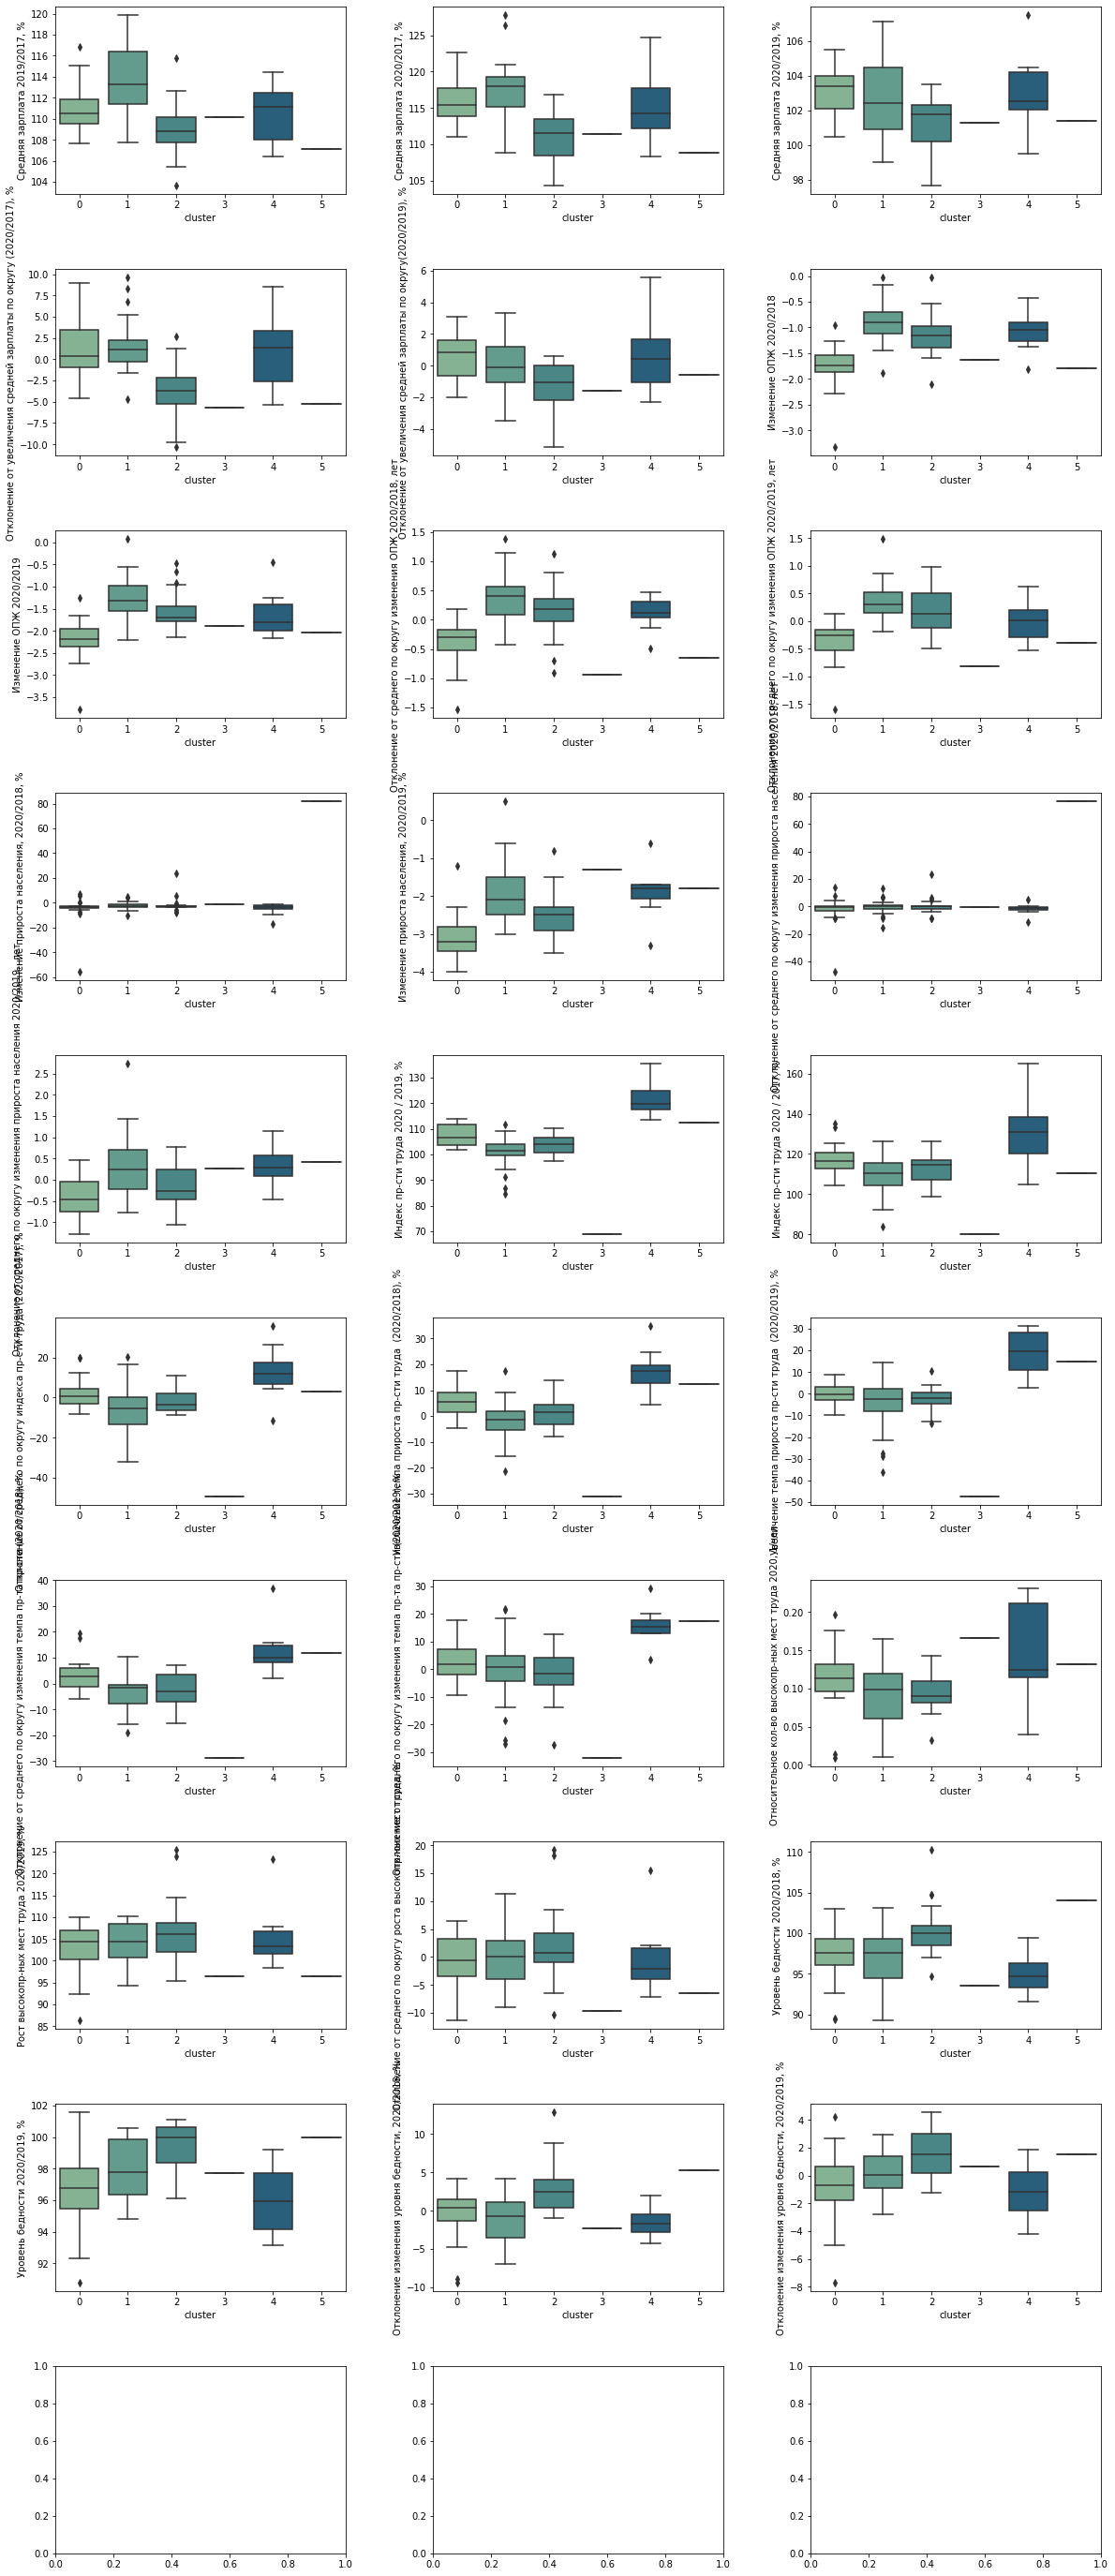

In [110]:
plotting_num(df_short, dict_short_km[6], df_short.columns)

## Результаты

In [36]:
fig = px.scatter_3d(
    X_pca_short, x=0, y=1, z=2,
    labels={'color': 'species'},
    color=dict_short_km[6]
)
fig.update_traces(marker_size=2)
fig.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



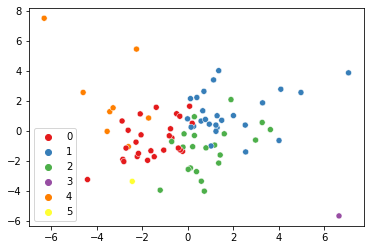

In [37]:
sns.scatterplot(X_pca_short[:, 0], X_pca_short[:, 1],
                hue=dict_short_km[6], palette='Set1')
plt.show()

In [38]:
df_short_labels = df_short.copy()
df_short_labels['labels'] = dict_short_km[6]

In [39]:
df_short_1 = df_short_labels.loc[df_short_labels['labels'] == 1]
df_short_1.index

Index(['Воронежская область', 'Ивановская область', 'Тверская область',
       'Архангельская область без Ненецкого автономного округа',
       'Вологодская область', 'Псковская область', 'Республика Адыгея',
       'Республика Крым', 'г. Севастополь', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика',
       'Республика Марий Эл ', 'Удмуртская Республика', 'Пермский край',
       'Кировская область', 'Республика Алтай', 'Республика Тыва',
       'Алтайский край', 'Красноярский край ', 'Кемеровская область',
       'Забайкальский край', 'Камчатский край', 'Приморский край',
       'Сахалинская область', 'Еврейская автономная область'],
      dtype='object')

In [40]:
df_short_2 = df_short_labels.loc[df_short_labels['labels'] == 5]
df_short_2.index

Index(['Республика Коми'], dtype='object')

In [41]:
df_short_0 = df_short_labels.loc[df_short_labels['labels'] == 0]
df_short_0.index

Index(['Белгородская область', 'Калужская область', 'Курская область',
       'Липецкая область', 'Орловская область', 'Рязанская область',
       'Тульская область', 'г. Москва', 'Республика Карелия',
       'Мурманская область', 'г.Санкт-Петербург ', 'Волгоградская область',
       'Республика Дагестан', 'Чеченская Республика',
       'Республика Башкортостан', 'Республика Мордовия',
       'Республика Татарстан', 'Чувашская Республика', 'Оренбургская область',
       'Пензенская область', 'Самарская область', 'Саратовская область',
       'Новосибирская область', 'Омская область', 'Томская область',
       'Амурская область'],
      dtype='object')

# Модель на отклонениях

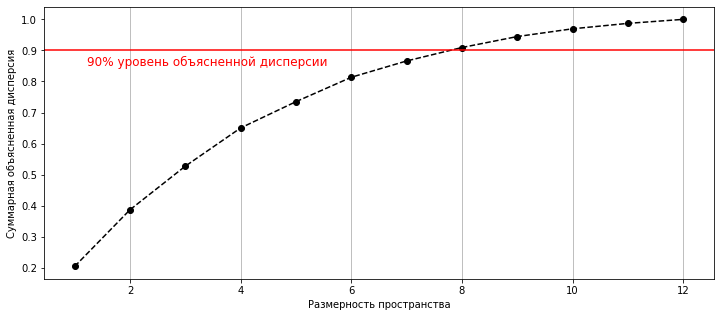

In [74]:
X_ss = StandardScaler().fit_transform(df_ss)

pca = PCA().fit(X_ss)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--', color='black')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(s='90% уровень объясненной дисперсии', x=0.2 *
         len(pca.explained_variance_ratio_)+1, y=0.85, color='red', fontsize=12, ha='center')
plt.grid(axis='x')

plt.xlabel('Размерность пространства')
plt.ylabel('Суммарно объясненная дисперсия')
plt.show()

In [114]:
pca = PCA(n_components=0.9, random_state=352)
X_pca_ss = pca.fit_transform(X_ss)

fig = px.scatter_3d(
    X_pca_ss, x=0, y=1, z=2,
    labels={'color': 'species'},
    color_continuous_scale=["red", "blue", "green"])

fig.update_traces(marker_size=2)
fig.show()

  0%|          | 0/10 [00:00<?, ?it/s]

2 clusters
----------------------------------------------------------------------------------------------------


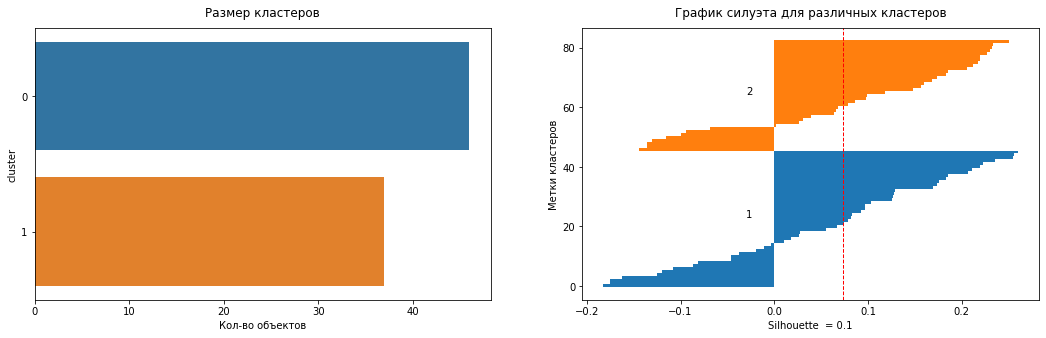

3 clusters
----------------------------------------------------------------------------------------------------


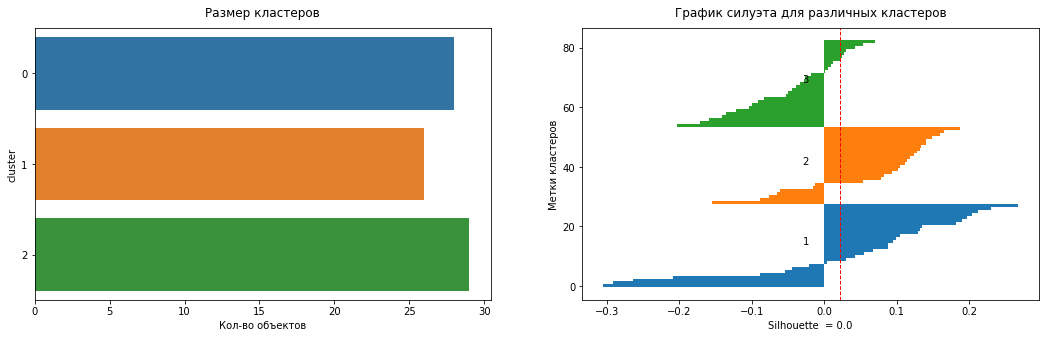

4 clusters
----------------------------------------------------------------------------------------------------


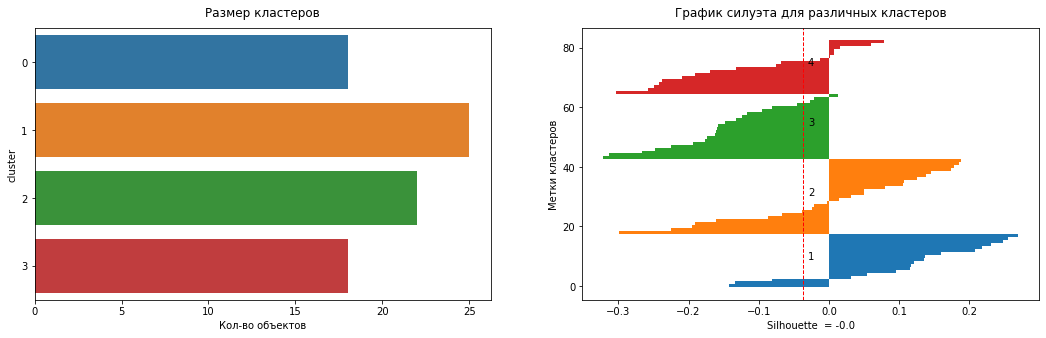

5 clusters
----------------------------------------------------------------------------------------------------


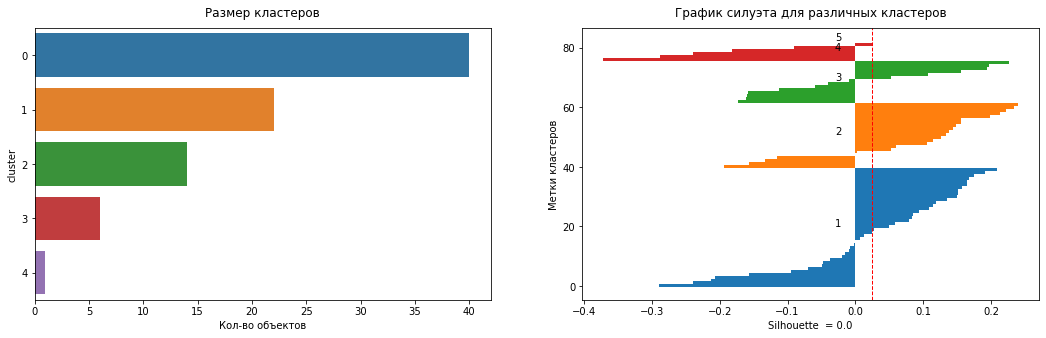

6 clusters
----------------------------------------------------------------------------------------------------


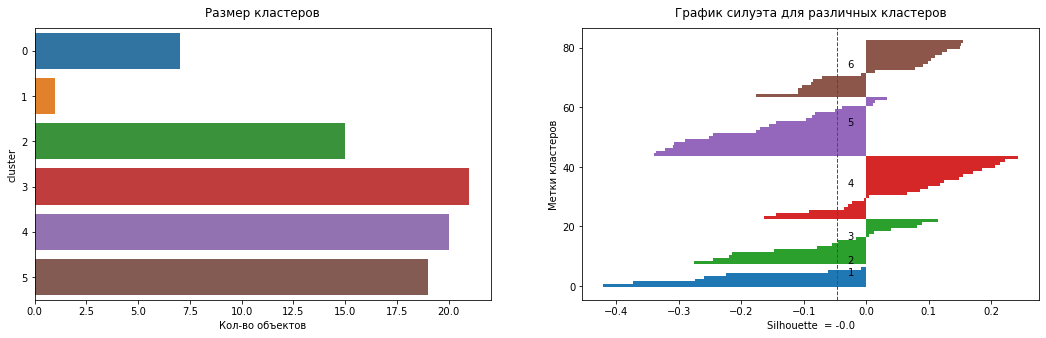

7 clusters
----------------------------------------------------------------------------------------------------


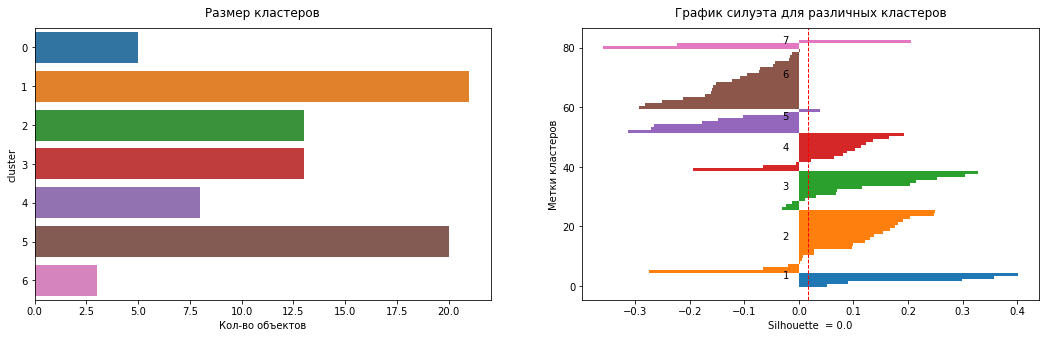

8 clusters
----------------------------------------------------------------------------------------------------


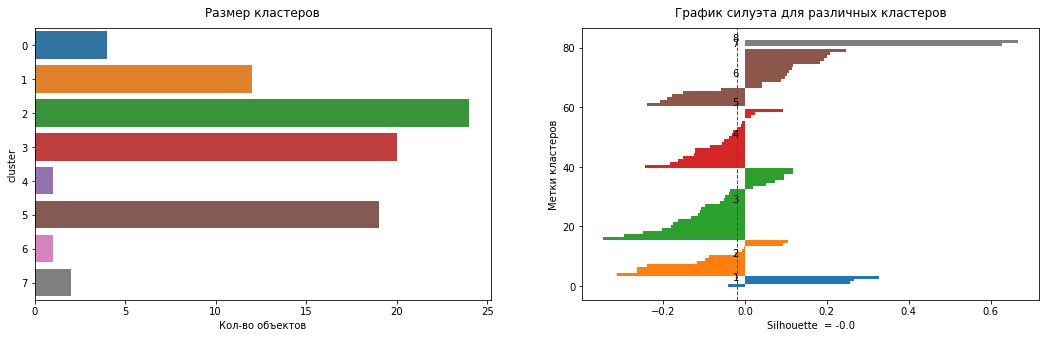

9 clusters
----------------------------------------------------------------------------------------------------


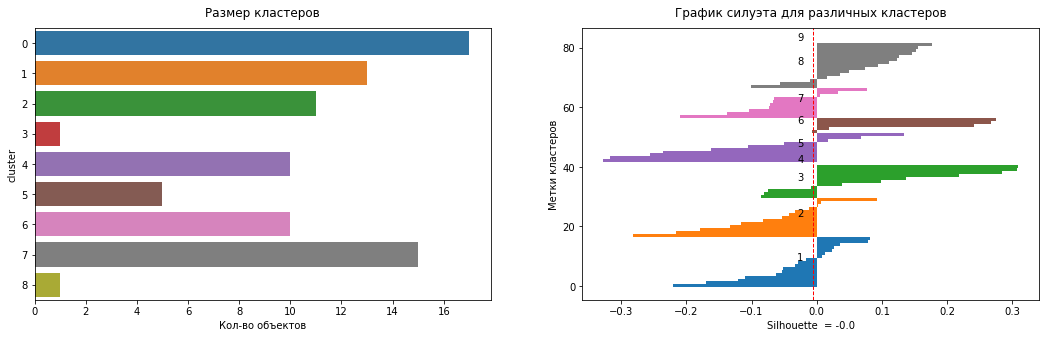

10 clusters
----------------------------------------------------------------------------------------------------


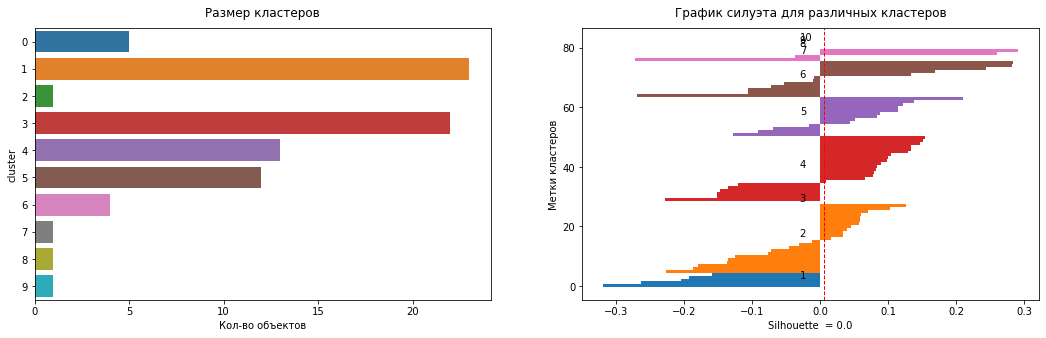

11 clusters
----------------------------------------------------------------------------------------------------


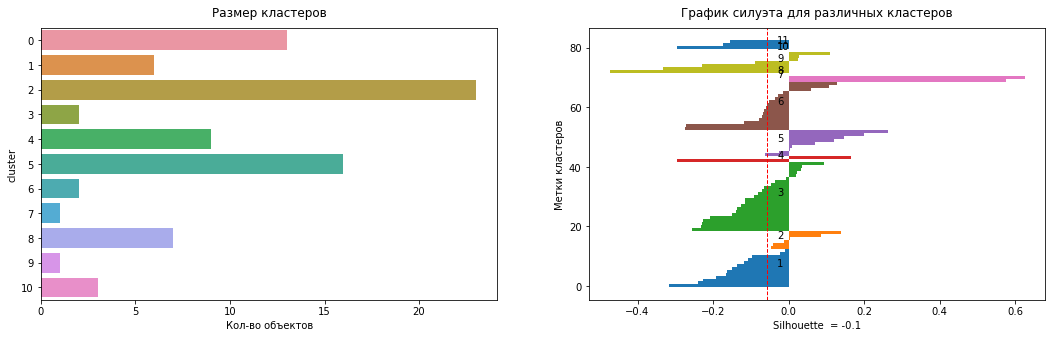

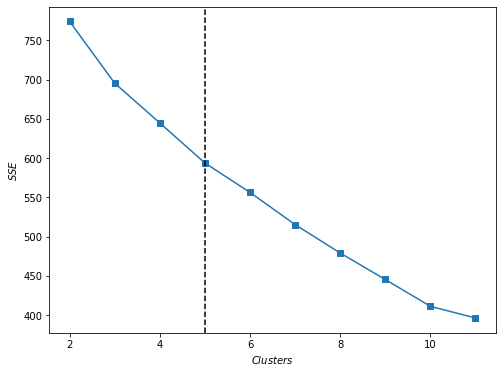

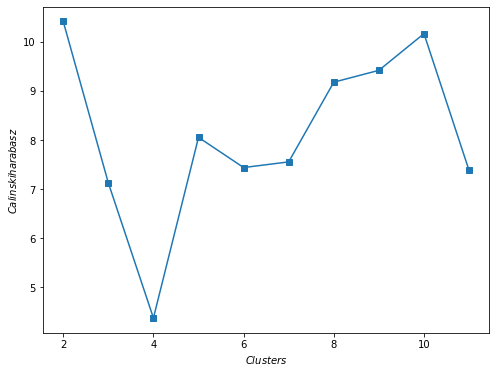

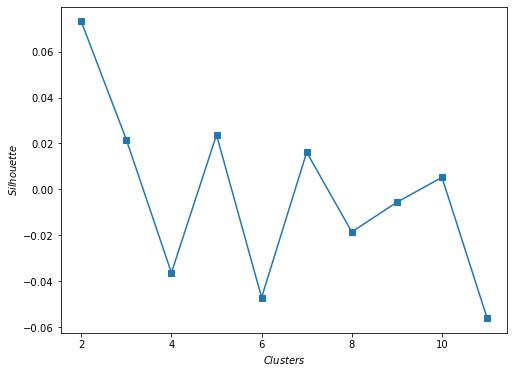

In [115]:
dict_ss_km = plot_clustering(data=df_ss,
                             data_scale=X_ss,
                             embedding=X_pca_ss,
                             kwargs=params_cluster['KMeans'],
                             model=KMeans,
                             type_train='embedding')

In [45]:
df_ss

Отклонение от увеличения средней зарплаты по округу (2020/2017), %  \
Белгородская область                                                   2.461111                    
Брянская область                                                       0.061111                    
Владимирская область                                                   2.861111                    
Воронежская область                                                    0.761111                    
Ивановская область                                                    -4.738889                    
...                                                                         ...                    
Хабаровский край                                                     -10.354545                    
Амурская область                                                       3.945455                    
Магаданская область                                                    4.645455                    
Сахалинская область                                                    3.545455                    
Еврейская автономная область                                           1.345455                    

                              Отклонение от увеличения средней зарплаты по округу(2020/2019), %  \
Белгородская область                                                   2.705556                   
Брянская область                                                       0.405556                   
Владимирская область                                                   0.605556                   
Воронежская область                                                    0.005556                   
Ивановская область                                                    -1.194444                   
...                                                                         ...                   
Хабаровский край                                                      -5.163636                   
Амурская область                                                       0.836364                   
Магаданская область                                                    1.636364                   
Сахалинская область                                                   -2.963636                   
Еврейская автономная область                                           1.636364                   

                              Отклонение от среднего по округу изменения ОПЖ 2020/2018, лет  \
Белгородская область                                                   0.057778               
Брянская область                                                       0.217778               
Владимирская область                                                   0.097778               
Воронежская область                                                    0.077778               
Ивановская область                                                     0.737778               
...                                                                         ...               
Хабаровский край                                                      -0.913636               
Амурская область                                                      -1.033636               
Магаданская область                                                    0.256364               
Сахалинская область                                                    0.456364               
Еврейская автономная область                                          -0.423636               

                              Отклонение от среднего по округу изменения ОПЖ 2020/2019, лет  \
Белгородская область                                                   0.088333               
Брянская область                                                       0.188333               
Владимирская область                                                   0.028333               
Воронежская область                                                    0.168333               
Ивановская область      

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density est

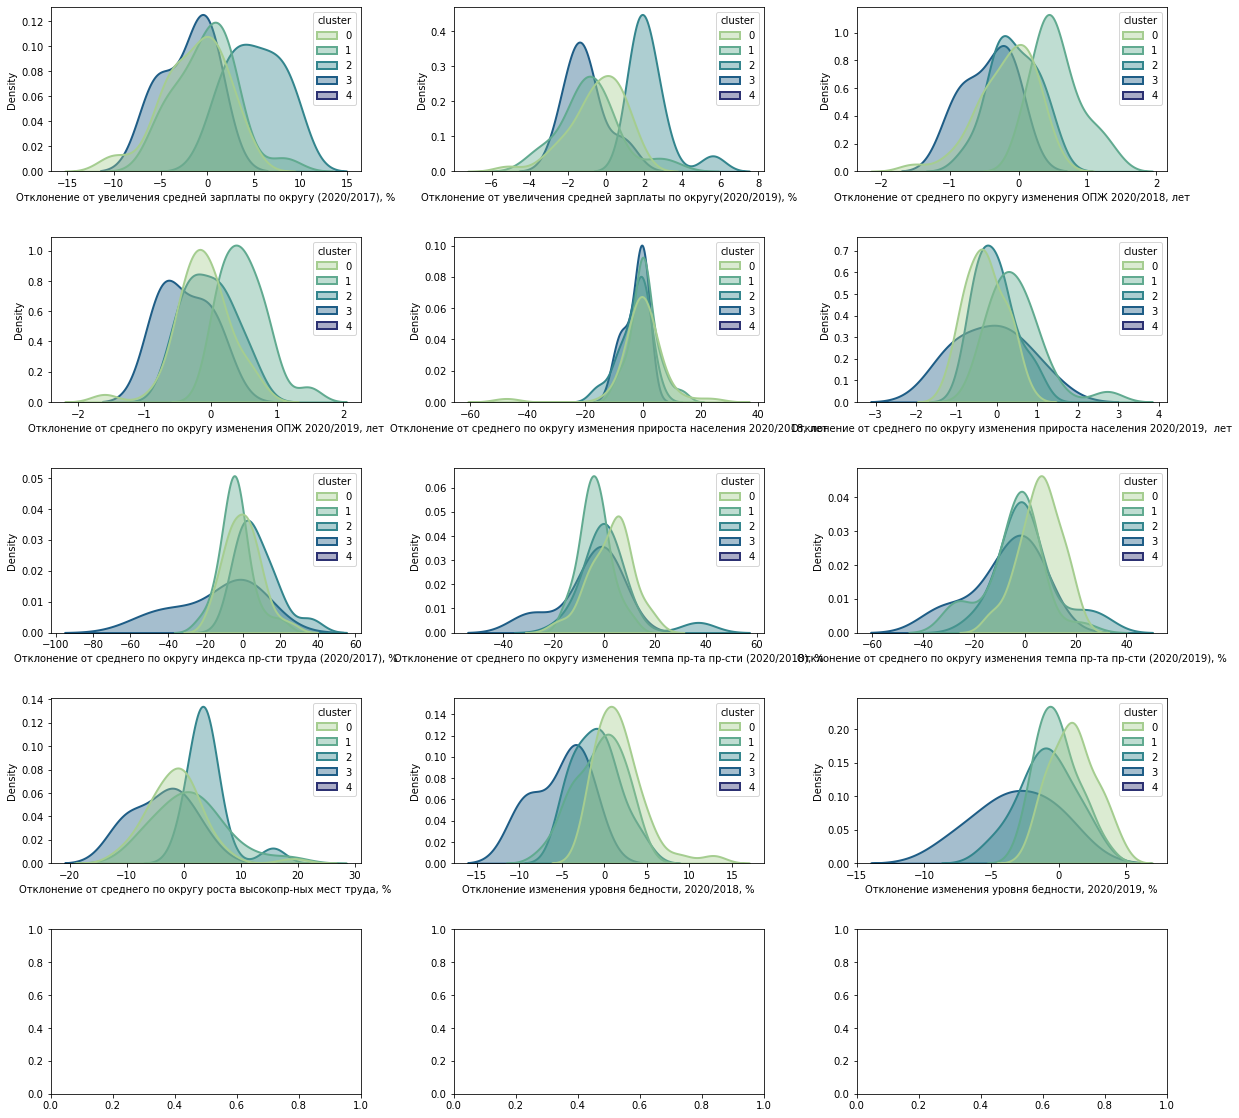

In [46]:
plotting_kde_num(df_ss, dict_ss_km[5], df_ss.columns[1, 2, 5, 6, 9, 10]

In [47]:
dict_ss_km[5]

array([2, 0, 0, 1, 1, 3, 1, 2, 0, 3, 2, 0, 1, 0, 1, 0, 0, 2, 2, 4, 1, 2,
       1, 0, 2, 0, 2, 3, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 1, 0])

In [1]:
fig = px.scatter_3d(
    X_pca_short, x=0, y=1, z=2,
    labels={'color': 'species'},
    color=dict_ss_km[5],
    color_continuous_scale=["blue", "blue", "blue", "red", "blue"])
fig.update_traces(marker_size=3)
fig.show()

NameError: name 'px' is not defined

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



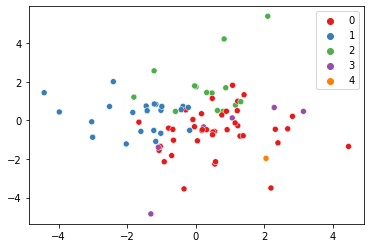

In [49]:
sns.scatterplot(X_pca_ss[:, 0], X_pca_ss[:, 1],
                hue=dict_ss_km[5], palette='Set1')
plt.show()

## Результаты

In [ ]:
df_ss_2 = df_ss_labels.loc[df_ss_labels['labels'] == 3]
df_ss_labels.loc[df_ss_labels['labels'] == 3].index